# 本次栈变量净生分析结论: 栈变量净生仅剩2.5%

- 上回结论：到程序结束时，栈变量 生24万、死22万、  净生2万，   即约10%的不平衡性

- 本回结论：到程序结束时，栈变量 生24万、死23.5万、净生0.5万，即**约2.5%的不平衡性, 较上次有实质性提升**。

# 产生滴答日志过程介绍



###### 1. 用 已正常工作的 clang加花括号插件libBrcPlugin.so 对目标物品llvm-project 加花括号
> [clang-plugin-add-brace/a5e9c786ec81de511c6a134684509b8d09a36091](http://localhost:10880/analyze_code/clang-plugin-add-brace/commit/a5e9c786ec81de511c6a134684509b8d09a36091)


```bash
# 用libBrcPlugin.so在编译过程中对源码加花括号
bash -x /pubx/llvm-project/doc_clang15_build/brc_build1_plugin.sh

#加花括号后源码为: https://gitcode.net/pubz/llvm-project/-/commit/161888dca45b61a745605d632a6e90d8ea9cb5ec

# 再次编译已经加花括号的源码，
#   编译成功、且编译产物clang-15能正常使用, 即验证了 加花括号 是 成功的，因为其没有影响clang正常功能。
bash -x /pubx/llvm-project/doc_clang15_build/brc_build2_directly.sh
```




###### 2. 获得已加花括号的目标物品llvm-project
> [llvm-project/161888dca45b61a745605d632a6e90d8ea9cb5ec](https://gitcode.net/pubz/llvm-project/-/commit/161888dca45b61a745605d632a6e90d8ea9cb5ec)
>
> 注意这个提交信息写错了，写成 'tick:...'了，应该写为'braced:...', 不过提交内容是没问题的



###### 3. 用 已经正常工作的 clang滴答插件libCTk.so 对已加花括号的目标物品llvm-project 加滴答语句
>[clang-ctk/9c913ca6348531db8191b4819967f9e68cc1030e](http://localhost:10880/analyze_code/clang-ctk/commit/9c913ca6348531db8191b4819967f9e68cc1030e)

```bash
# 用libCTk.so在编译过程中对源码加滴答语句
bash -x /pubx/llvm-project/doc_clang15_build/tick_build1_plugin.sh

#加滴答语句后源码为: llvm-project/-/commit/c8806b68ae44a5eb93ddd6e32e07fbfe0bc603b3  ，为了保密， 此源码不推送

# 再次编译已经加滴答语句的源码，
#  编译成功、且编译产物clang-15能正常使用, 即验证了 加滴答语句 是 成功的，因为其没有影响clang正常功能。
bash -x /pubx/llvm-project/doc_clang15_build/tick_build2_directly.sh
```

> 罗嗦一下， **编译 已加滴答语句后源码 获得 产物clang-15，运行该产物clang-15, 产生滴答日志，供本文分析**
>
>  此滴答文件如下:
```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main.c
ls -lhrt /tick_data_home/
#-rw-rw-r-- 1 zz zz 138M  8月  8 22:23 clang-15_960162_1691504630415_1  #下面就是对此滴答日志进行简单作图


```

###### 4. 获得已加滴答语句的目标物品llvm-project
> 由于保密原因，此提交不能推送: llvm-project/-/commit/c8806b68ae44a5eb93ddd6e32e07fbfe0bc603b3  

#  0. 用matplotlib找系统中字体文件大于1MB的
> 中文字体通常很大，这样过滤出的 通常有中文字体

> 结果中 看名字  'AR PL UMing CN' 果然是中文字体

In [1]:
from matplotlib.font_manager import fontManager
import os
 
fonts = [font.name for font in fontManager.ttflist if 
         os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
 
for font in fonts:
    print(font)

Peddana
TenaliRamakrishna
Noto Serif CJK JP
Noto Sans CJK JP
Noto Serif Tangut
Noto Serif CJK JP
Chandas
AR PL UMing CN
Noto Serif CJK JP
Noto Sans CJK JP
Noto Sans CJK JP
Noto Sans CJK JP
Droid Sans Fallback
Noto Sans CJK JP
Noto Sans SignWriting
FreeSerif
AR PL UKai CN
Noto Serif CJK JP
Timmana
Noto Serif CJK JP
Noto Serif CJK JP
Noto Serif CJK JP
Noto Sans CJK JP
Noto Sans CJK JP
Tibetan Machine Uni


#  1. 产生tick日志

#####  编译最小main : 文件 mini_main.c
```cpp
//文件 mini_main.c
int main(int argc, char** argv){
    return 0;
}
```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main.c
#生成tick日志文件:
#-rw-rw-r--  138M  8月  8 22:23 clang-15_960162_1691504630415_1
```

# 2. 加载tick日志

In [2]:
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc={'figure.figsize': (30,20)}

> 

In [3]:
import numpy 
import math

In [4]:
import seaborn

In [5]:
import plotly.offline as plotly_offline
plotly_offline.init_notebook_mode(connected=True)          
import plotly.graph_objs as graph_objs                
import plotly.figure_factory as figure_factory 

from plotly.graph_objs import Scatter, Figure, Scatter3d




> 解决 matplotlib 中文不正常显示问题，
>
> 中文显示为方块，原因是没有中文字体，
>
> 这里 将字体设置为 上面找到的中文字体 'AR PL UMing CN'

In [6]:
import matplotlib.pyplot
matplotlib.pyplot.rcParams['font.family'] = 'AR PL UMing CN'
matplotlib.pyplot.rcParams['font.sans-serif'] = [ 'AR PL UMing CN']

In [7]:
import pandas
# pandas.options.display.max_columns = None
# pandas.options.display.max_rows = None

In [8]:
%%bash
ls -lhrt /tick_data_home/ | tail -n 1

-rw-rw-r-- 1 zz zz 138M  8月  8 22:23 clang-15_960162_1691504630415_1


In [9]:
#编译正常: mini_main.c
df_mini_main=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_960162_1691504630415_1",sep=',' , quotechar="'")


In [10]:
df_mini_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014494 entries, 0 to 1014493
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   滴答           1014494 non-null  int64 
 1   tickKind     1014494 non-null  int64 
 2   funcEnterId  1014494 non-null  int64 
 3   rTSVarC      1014494 non-null  int64 
 4   d栈生          1014494 non-null  int64 
 5   d栈死          1014494 non-null  int64 
 6   d堆生          1014494 non-null  int64 
 7   d堆死          1014494 non-null  int64 
 8   栈生           1014494 non-null  int64 
 9   栈死           1014494 non-null  int64 
 10  栈净           1014494 non-null  int64 
 11  堆生           1014494 non-null  int64 
 12  堆死           1014494 non-null  int64 
 13  堆净           1014494 non-null  int64 
 14  srcFile      1014494 non-null  object
 15  funcLine     1014494 non-null  int64 
 16  funcCol      1014494 non-null  int64 
 17  funcName     1003994 non-null  object
dtypes: int64(16), object(2

In [11]:
df_mini_main.tail(5)

,滴答,tickKind,funcEnterId,rTSVarC,d栈生,d栈死,d堆生,d堆死,栈生,栈死,栈净,堆生,堆死,堆净,srcFile,funcLine,funcCol,funcName
1014489,1012462,0,122004,1,1,0,0,0,239876,235690,4186,0,0,0,/pubx/llvm-project/llvm/lib/Support/PrettyStac...,195,39,printForSigInfoIfNeeded
1014490,1012463,0,122004,1,0,0,0,0,239876,235690,4186,0,0,0,/pubx/llvm-project/llvm/lib/Support/PrettyStac...,195,39,printForSigInfoIfNeeded
1014491,1012464,2,122004,1,0,1,0,0,239876,235690,4186,0,0,0,/pubx/llvm-project/llvm/lib/Support/PrettyStac...,195,39,printForSigInfoIfNeeded
1014492,1012465,2,122003,0,0,0,0,0,239876,235691,4185,0,0,0,/pubx/llvm-project/llvm/lib/Support/PrettyStac...,227,49,llvm::PrettyStackTraceEntry::~PrettyStackTrace...
1014493,1011967,1,121841,0,0,0,0,0,239875,235690,4185,0,0,0,/pubx/llvm-project/llvm/lib/Support/MemAlloc.cpp,24,72,llvm::deallocate_buffer


In [12]:
#备份
dfmm=df_mini_main

In [13]:

#tick日志特别的密集，这里间隔200个tick采样一次，方便输出观看，否则容易浏览器卡死 图出不来。
df_mini_main=df_mini_main[::200]  #pandas.Dataframe间隔200行采样1行


In [14]:
dfmm.shape,  df_mini_main.shape

((1014494, 18), (5073, 18))

# 3. funcId 构造

In [15]:
dfmm.head(1)

,滴答,tickKind,funcEnterId,rTSVarC,d栈生,d栈死,d堆生,d堆死,栈生,栈死,栈净,堆生,堆死,堆净,srcFile,funcLine,funcCol,funcName
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,2603,42,llvm::cl::getGeneralCategory


####  3.1 新增列 funcLoc  相当于字符串样式的funId

In [16]:
#新增列 funcLoc 
dfmm['funcLoc']=dfmm .apply(lambda r: f'{r.srcFile}_{r.funcLine}_{r.funcCol}', axis=1 )
dfmm['funcLoc'].values[:4]

array(['/pubx/llvm-project/llvm/lib/Support/CommandLine.cpp_2603_42',
       '/pubx/llvm-project/llvm/lib/Support/CommandLine.cpp_2603_42',
       '/pubx/llvm-project/llvm/lib/Support/CommandLine.cpp_480_41',
       '/pubx/llvm-project/llvm/lib/Support/CommandLine.cpp_480_41'],
      dtype=object)

####  3.2  以 区间[0, funcLoc不重复个数-1] 作为 funcId表

In [17]:

funcLoc_values=dfmm['funcLoc'].values
type(funcLoc_values)#numpy.ndarray
len(funcLoc_values)#1014494

funcLoc_list=list(funcLoc_values)
len(funcLoc_list)#1014494

#funcLoc转为集合
funcLoc_set=set(funcLoc_values)
len(funcLoc_set)#2838

#funcLoc集合作为列表: 即 不重复的funcLoc 列表
uqFuncLoc_Ls=list(funcLoc_set)
len(uqFuncLoc_Ls)#2838
#uq:unique

#不重复的funcLoc 列表 转为 funcId表
funcId_Tab=dict( [(fL,j) for j,fL in enumerate(uqFuncLoc_Ls)] )
list(funcId_Tab.items())[:5]

[('/pubx/llvm-project/clang/lib/Driver/Driver.cpp_670_78', 0),
 ('/pubx/llvm-project/clang/lib/Sema/SemaCodeComplete.cpp_387_69', 1),
 ('/pubx/llvm-project/clang/lib/Sema/SemaType.cpp_4798_77', 2),
 ('/pubx/llvm-project/llvm/lib/Support/CommandLine.cpp_2733_38', 3),
 ('/pubx/llvm-project/clang/lib/AST/ASTContext.cpp_8997_55', 4)]

In [18]:
print("funcId个数:",len(funcId_Tab))

funcId个数: 2838


####  3.3  参照 funLoc列、funcId表 新增列funcId

In [19]:
#新增列 funcId 
dfmm['funcId']=dfmm['funcLoc'] .apply(lambda fLocJ:  funcId_Tab[fLocJ] )
dfmm['funcId'].values[:10]
dfmm.head(2)

,滴答,tickKind,funcEnterId,rTSVarC,d栈生,d栈死,d堆生,d堆死,栈生,栈死,栈净,堆生,堆死,堆净,srcFile,funcLine,funcCol,funcName,funcLoc,funcId
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,2603,42,llvm::cl::getGeneralCategory,/pubx/llvm-project/llvm/lib/Support/CommandLin...,2520
1,2,0,0,1,1,0,0,0,1,0,1,0,0,0,/pubx/llvm-project/llvm/lib/Support/CommandLin...,2603,42,llvm::cl::getGeneralCategory,/pubx/llvm-project/llvm/lib/Support/CommandLin...,2520


####  3.x  开发用代码

In [20]:
#开发用代码

dfmm_10=dfmm[:10]

dfmm_10['funcLoc']=dfmm_10 .apply(lambda r: f'{r.srcFile}_{r.funcLine}_{r.funcCol}', axis=1 )
# dfmm_10['funcLoc'].values[:2]

values_10=dfmm_10['funcLoc'].values
type(values_10),list(values_10),set(values_10)


#####

#新增列 funcId 
dfmm_10['funcId']=dfmm_10['funcLoc'] .apply(lambda fLocJ:  funcId_Tab[fLocJ] )
dfmm_10['funcId'].values

array([2520, 2520, 1133, 1133, 2162, 2162, 2543, 2543, 2162,  194])

# 4. funcId 作图

####  4.1  作图 funcId作为颜色

In [21]:
#日志条数
tickCnt=dfmm.shape[0]

#10%日志条数
TC10Percent=int(0.1*tickCnt)


print(f"日志条数:{tickCnt},10%日志条数:{TC10Percent}")

日志条数:1014494,10%日志条数:101449


######  4.1.1  第1个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

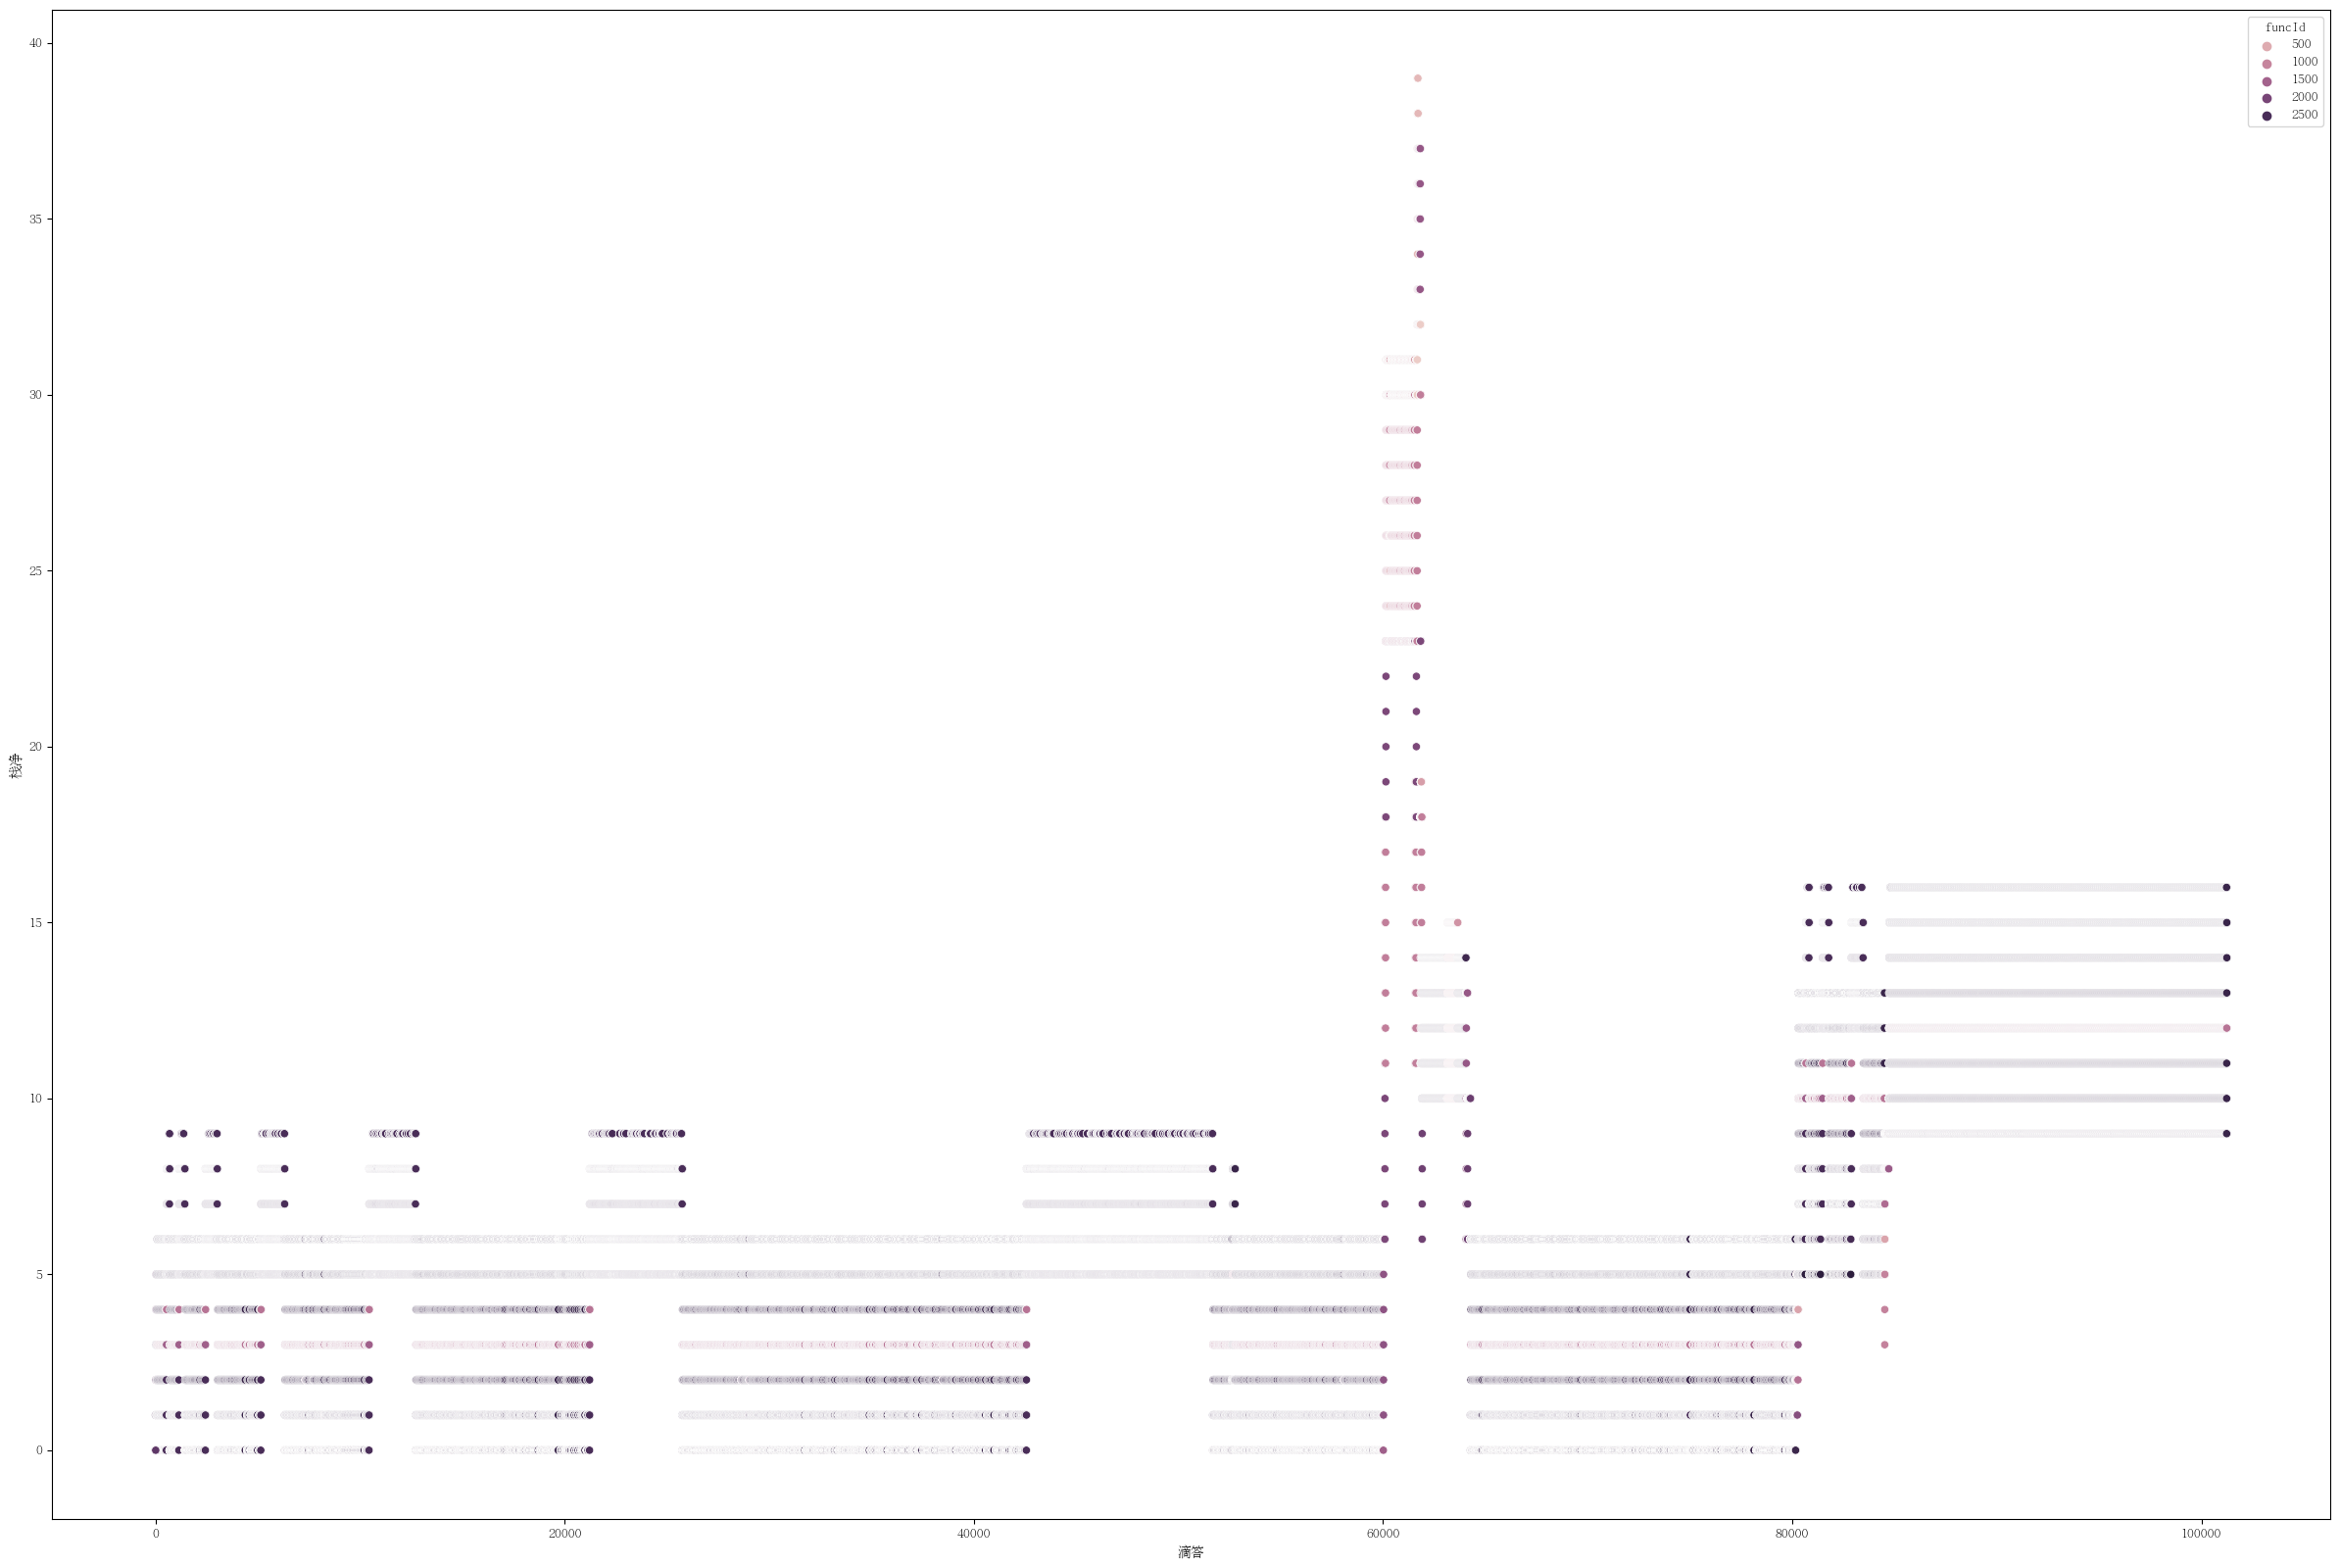

In [22]:
k=0
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.2  第2个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

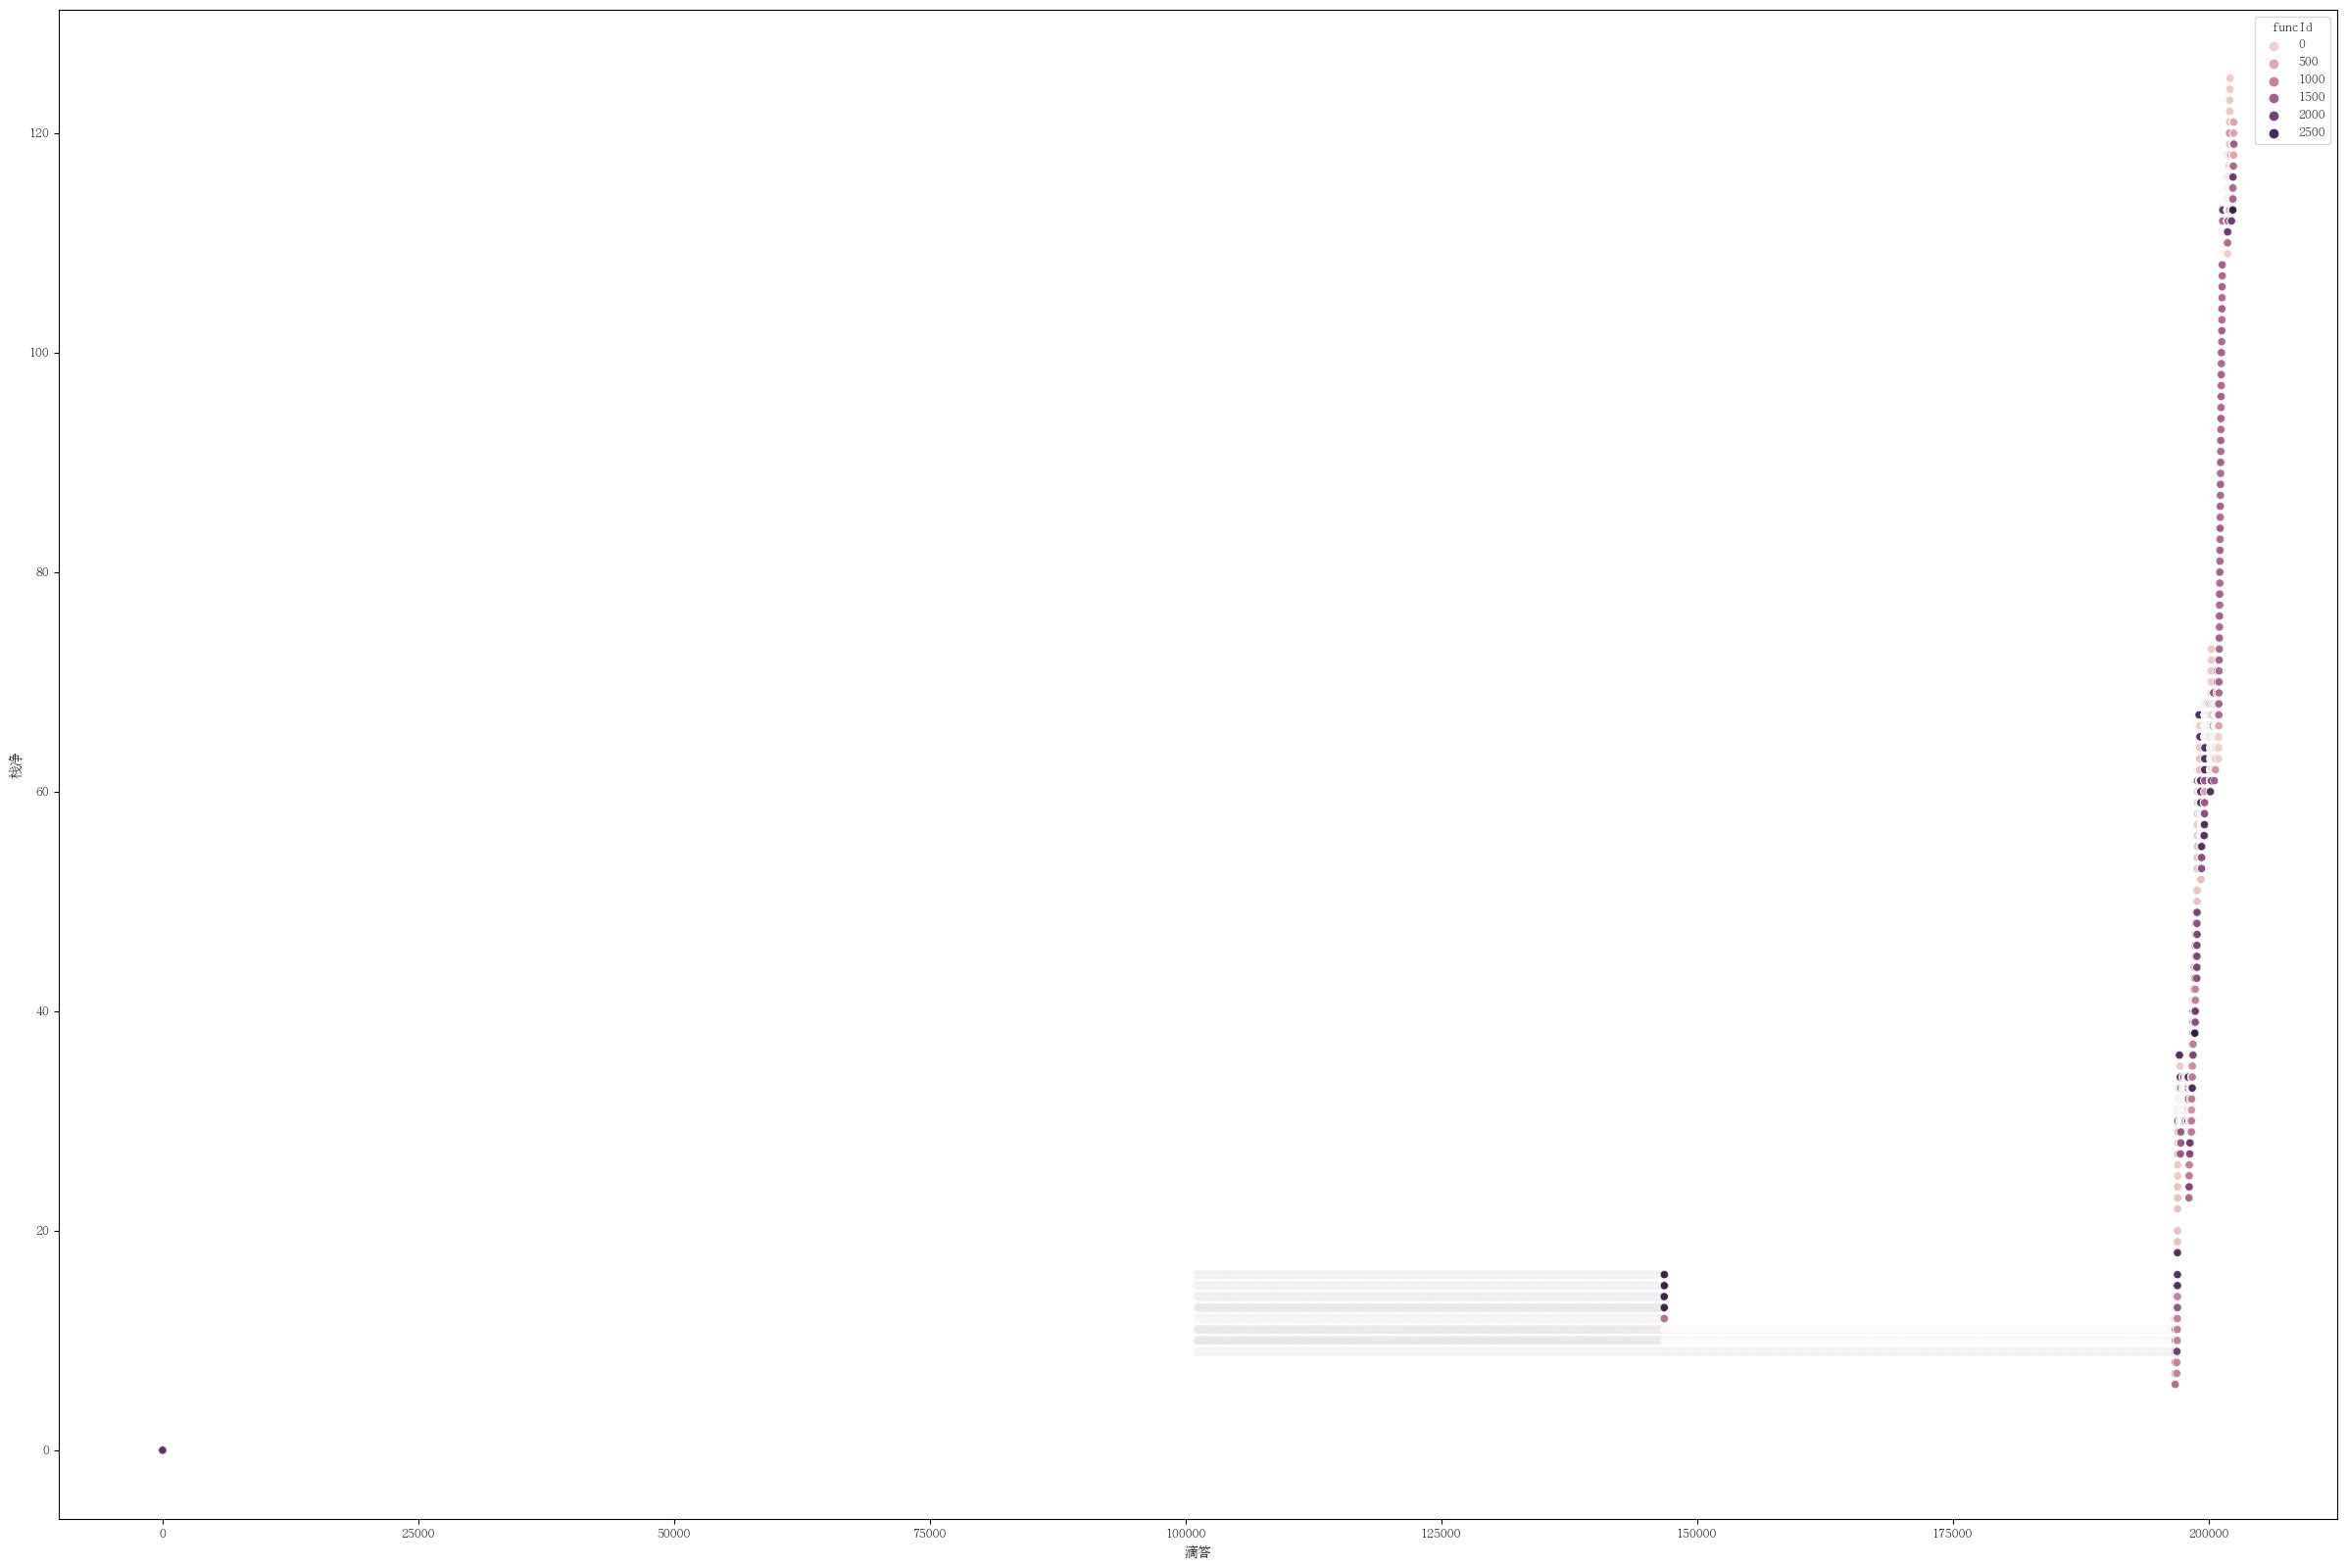

In [23]:
k=1
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.3  第3个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

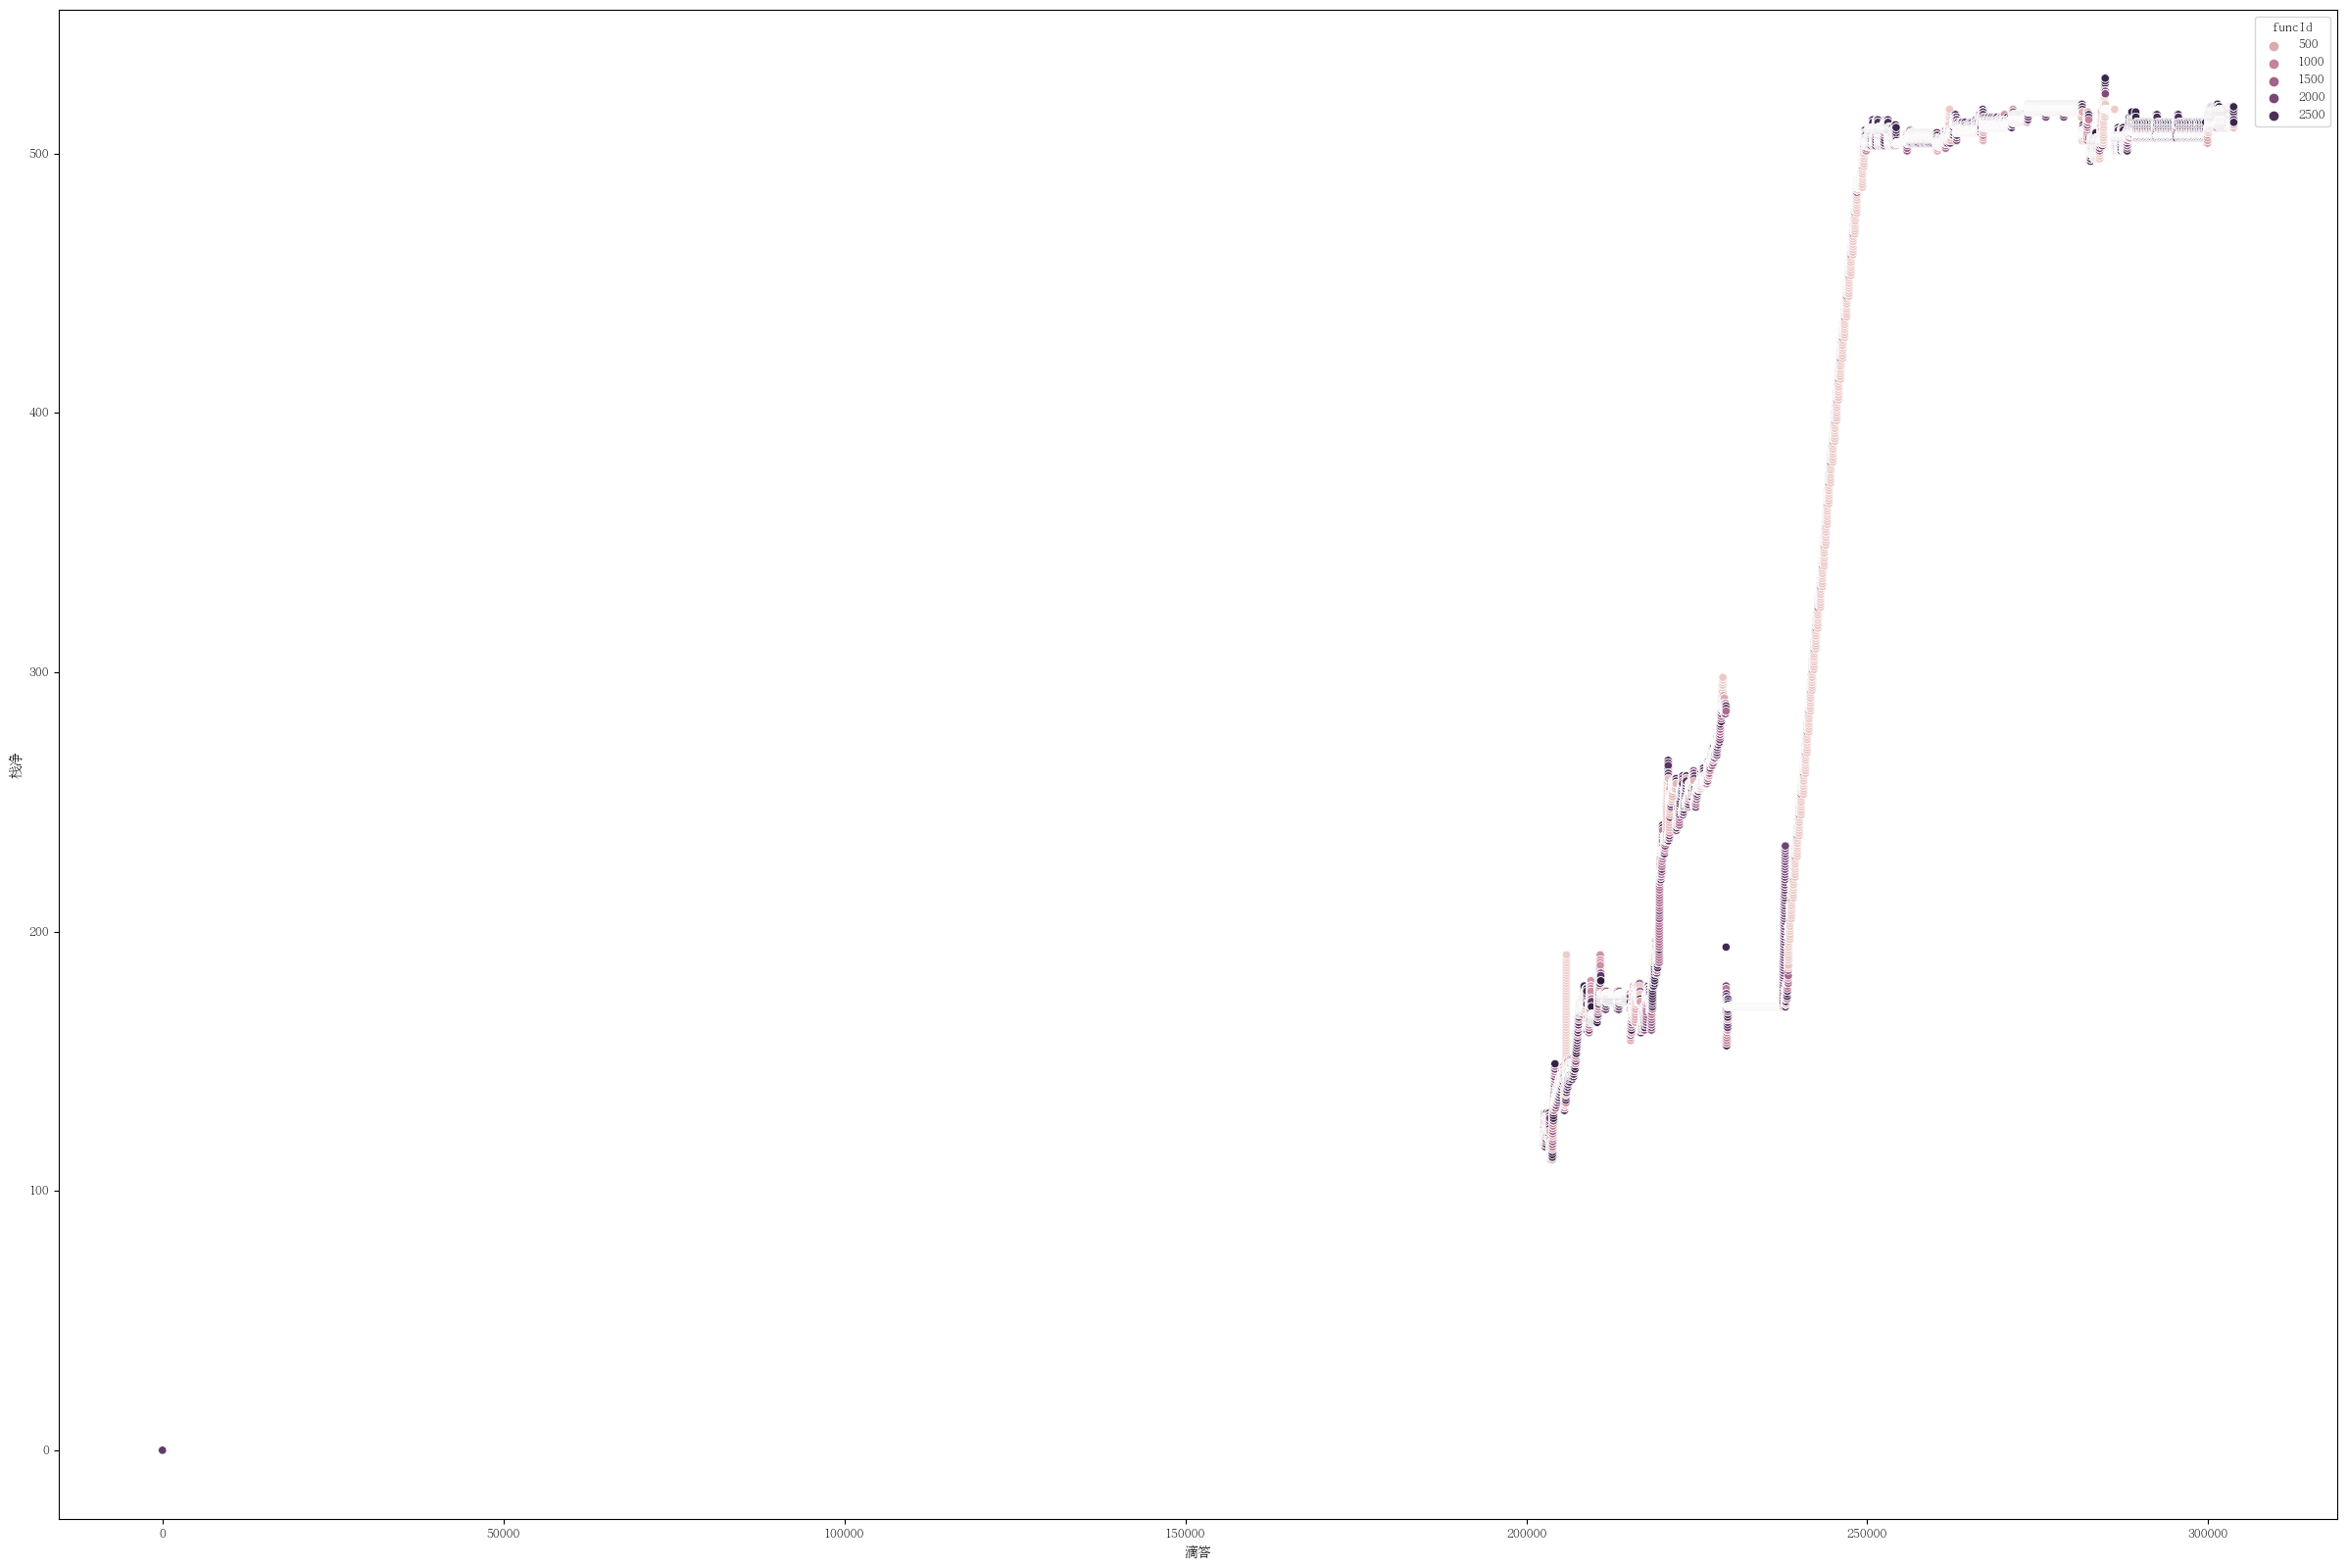

In [24]:
k=2
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.4 第4个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

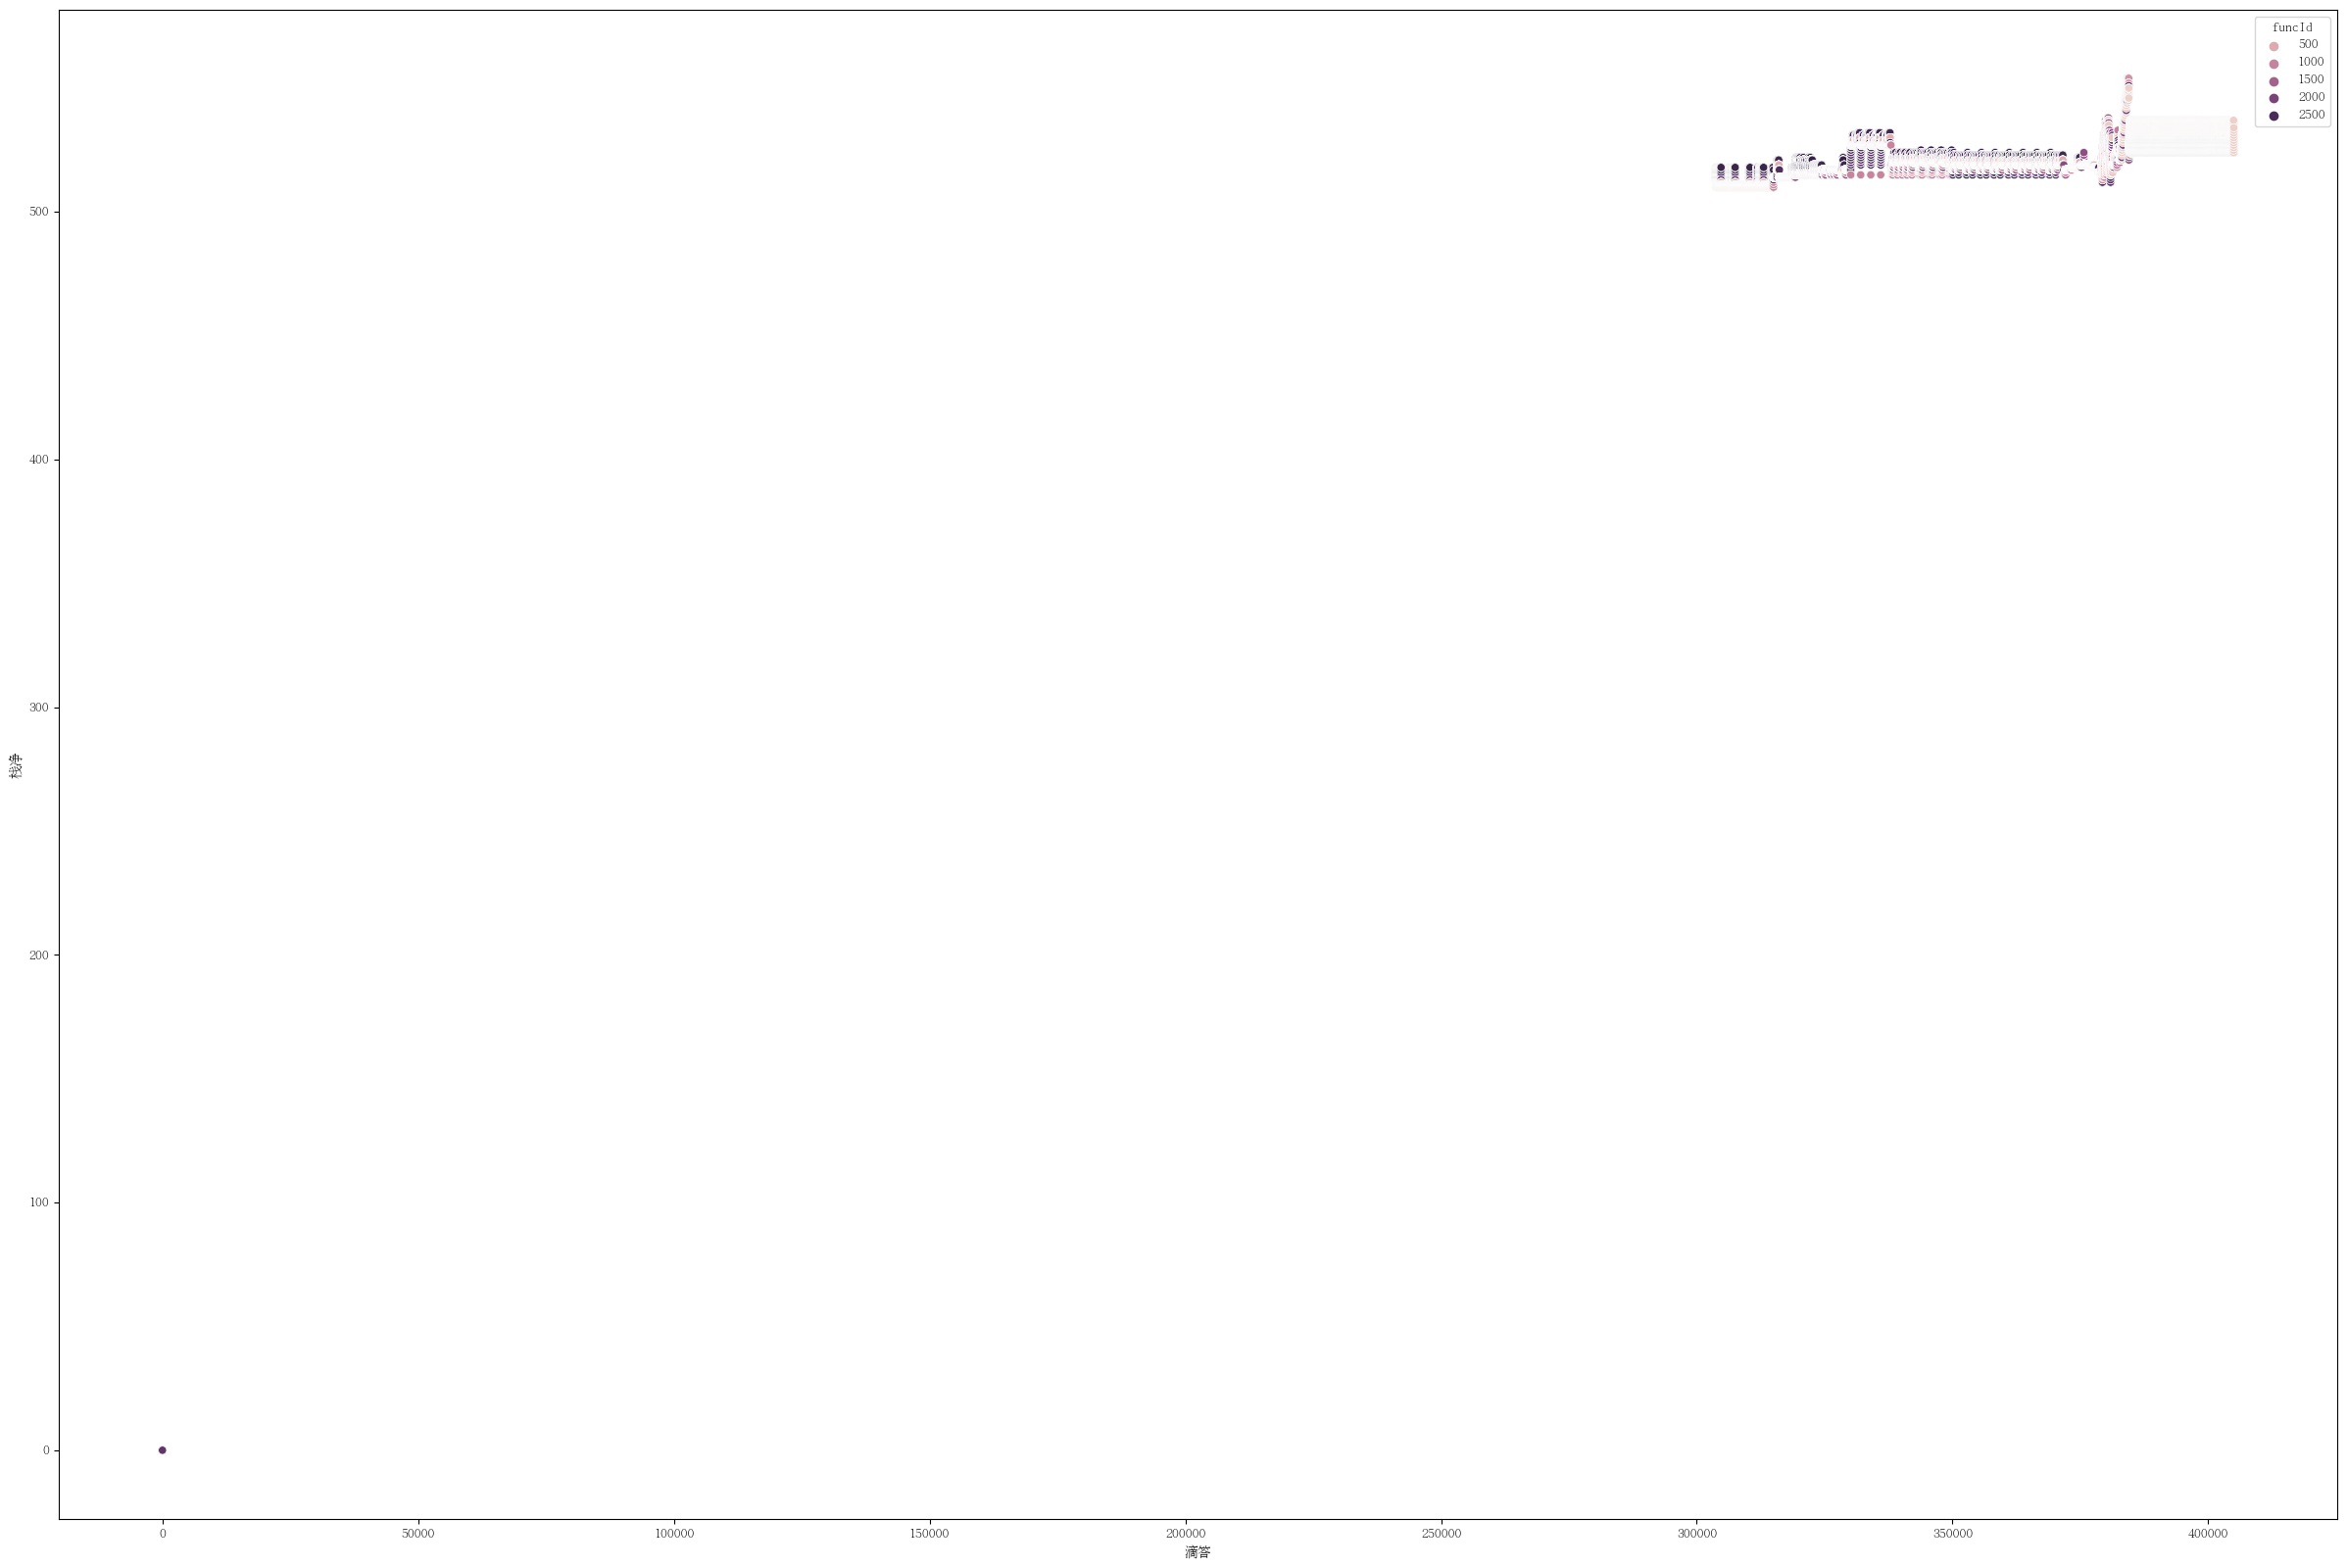

In [25]:
k=3
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.5  第5个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

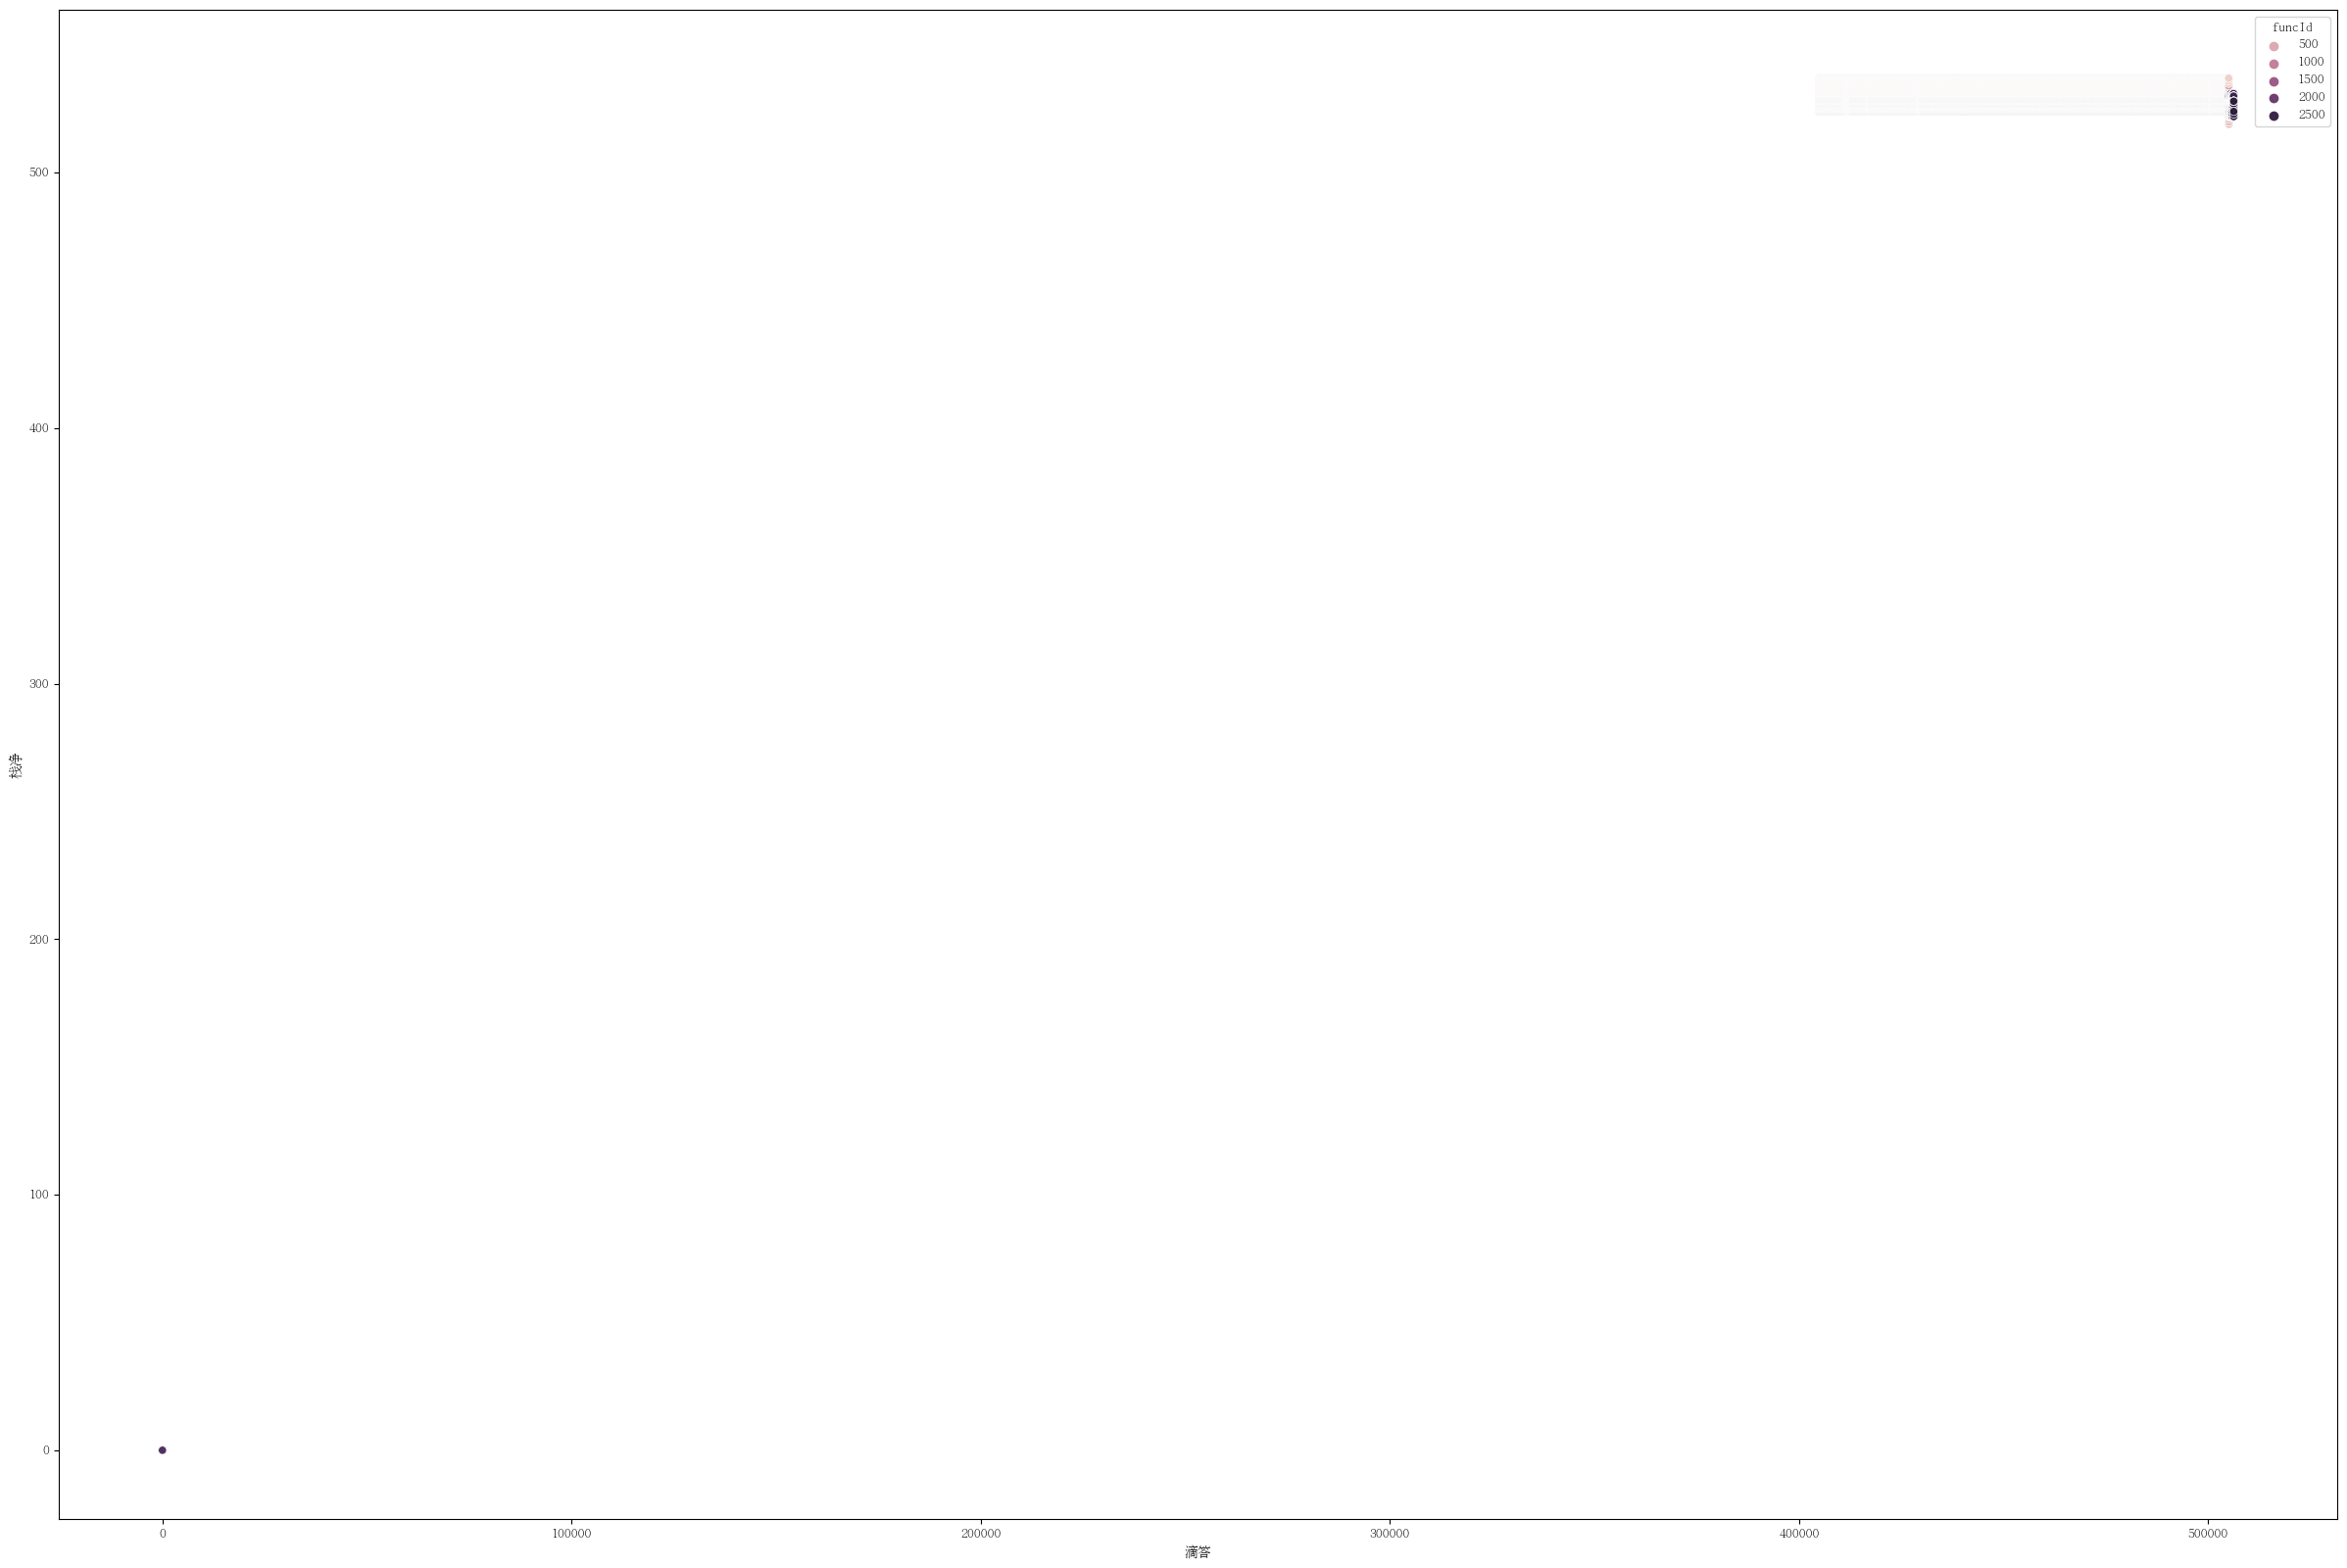

In [26]:
k=4
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.6  第6个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

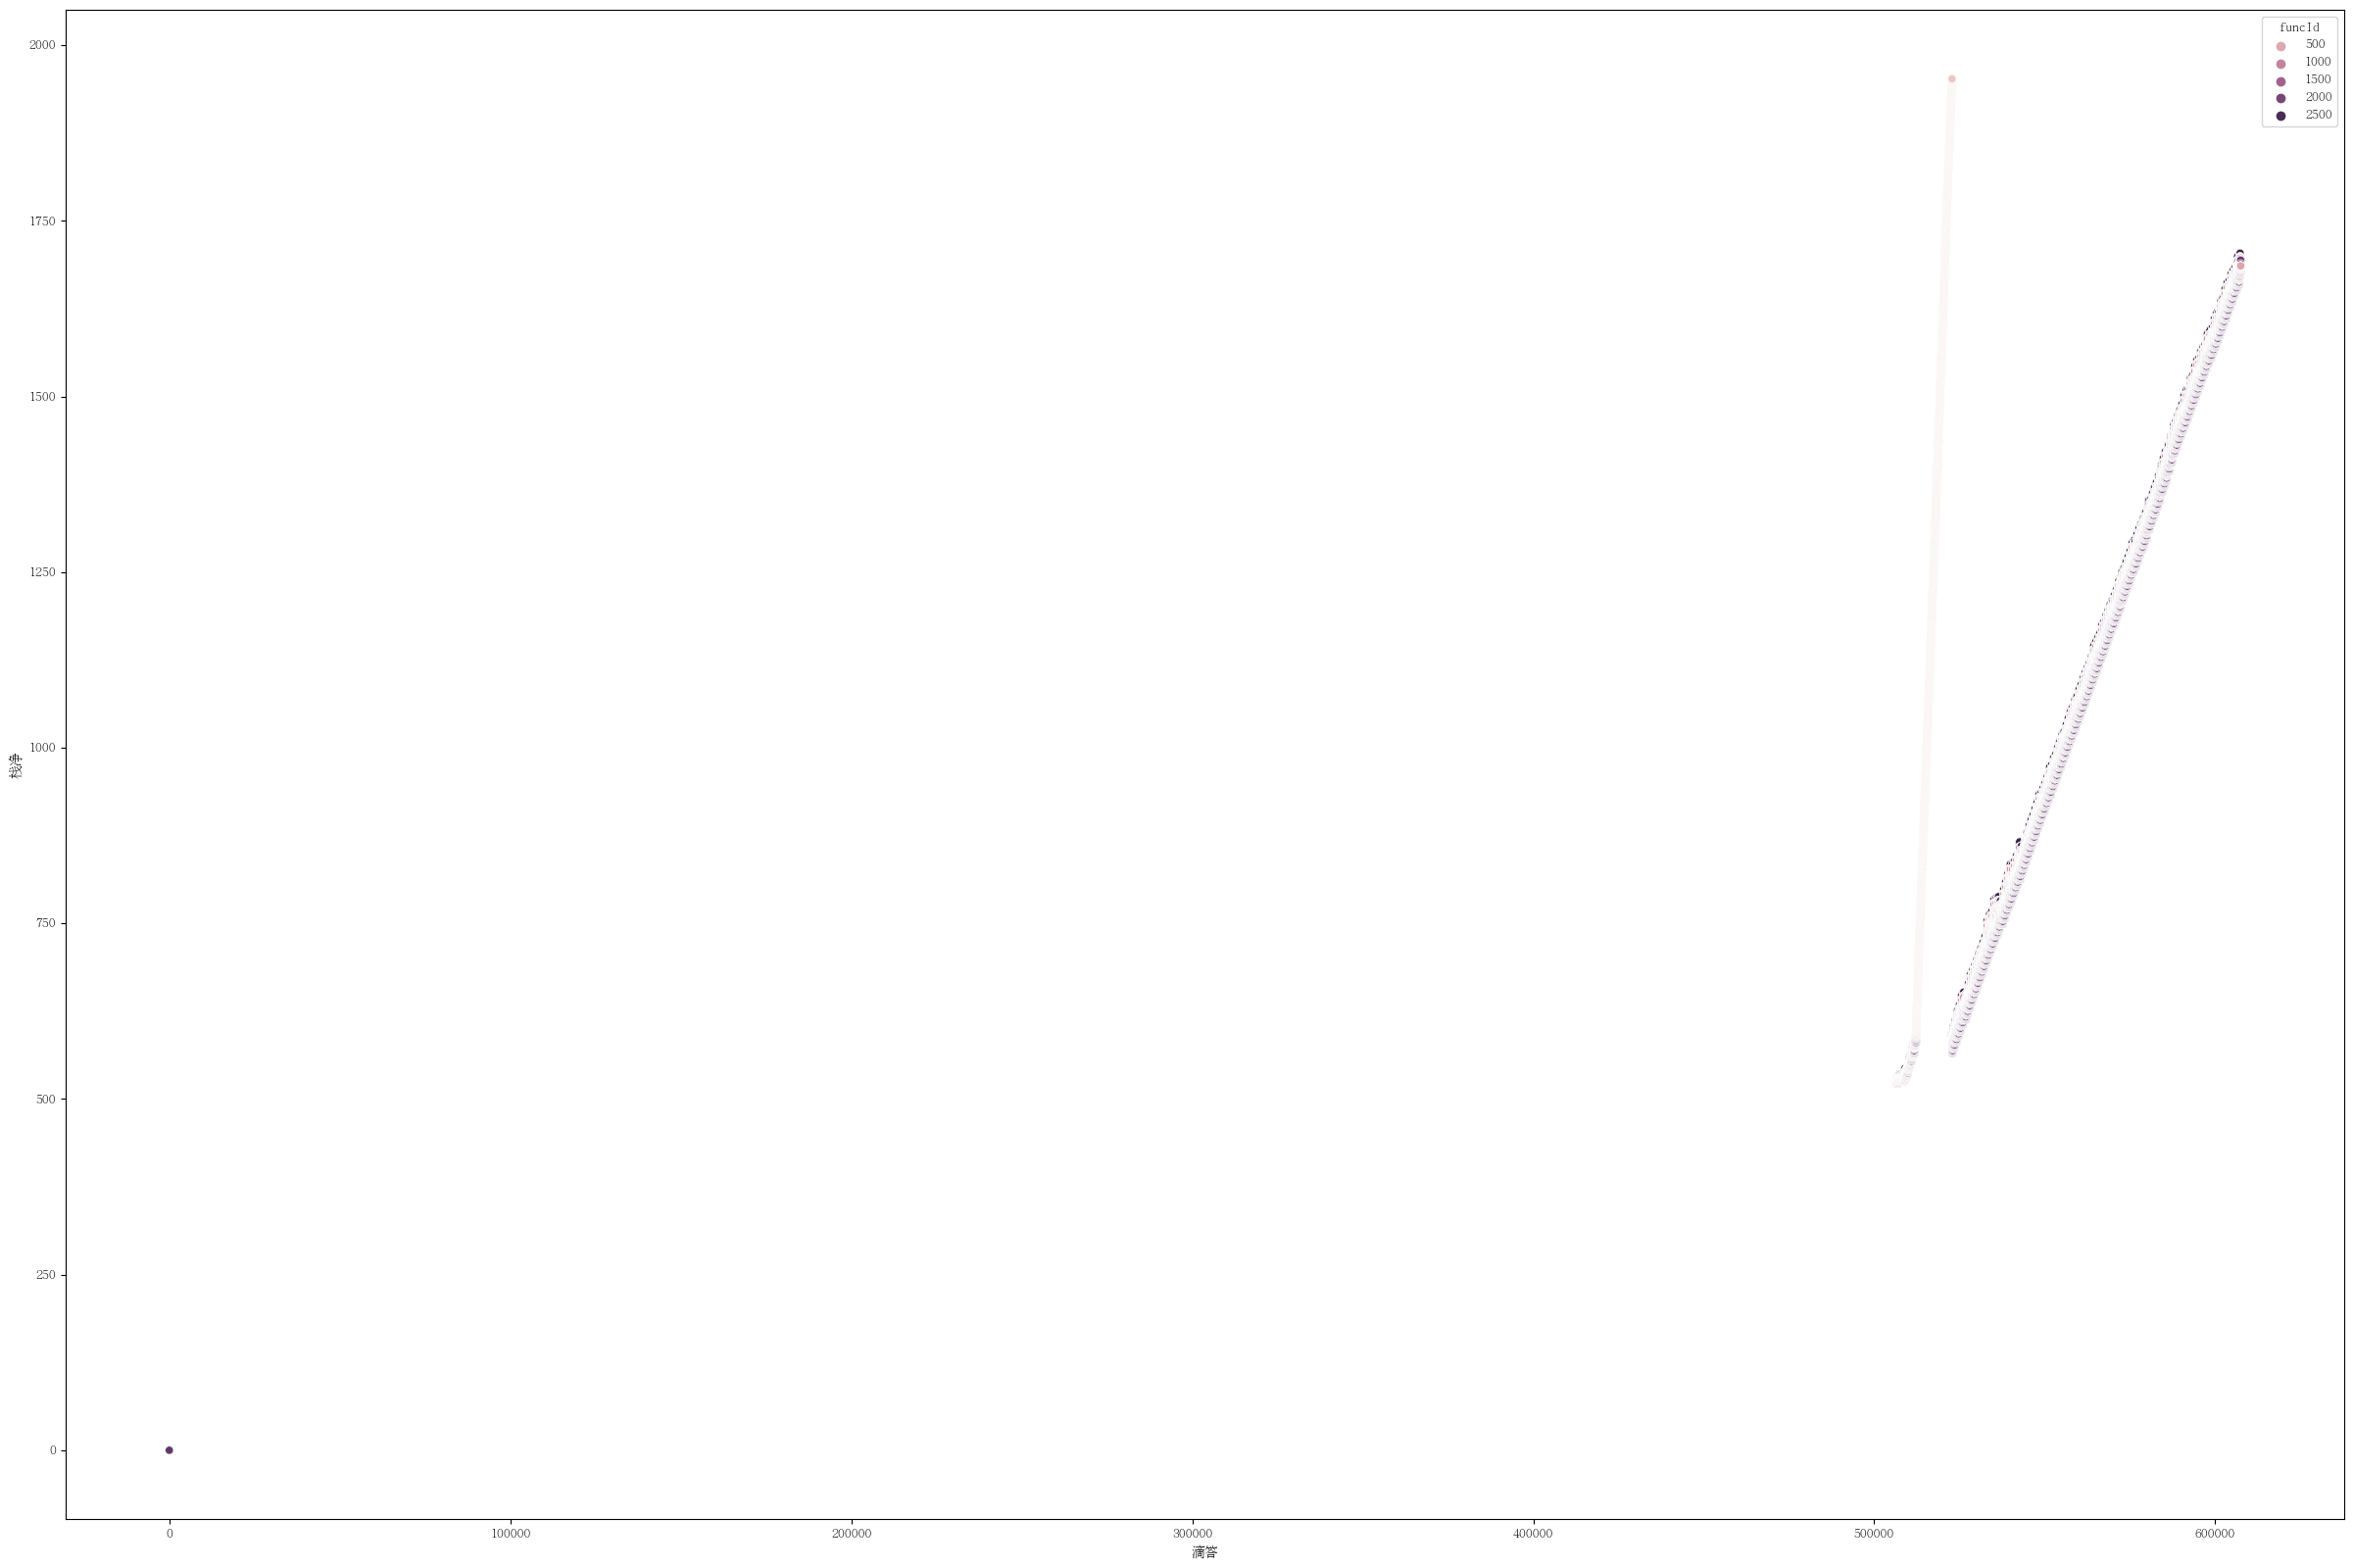

In [27]:
k=5
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.7  第7个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

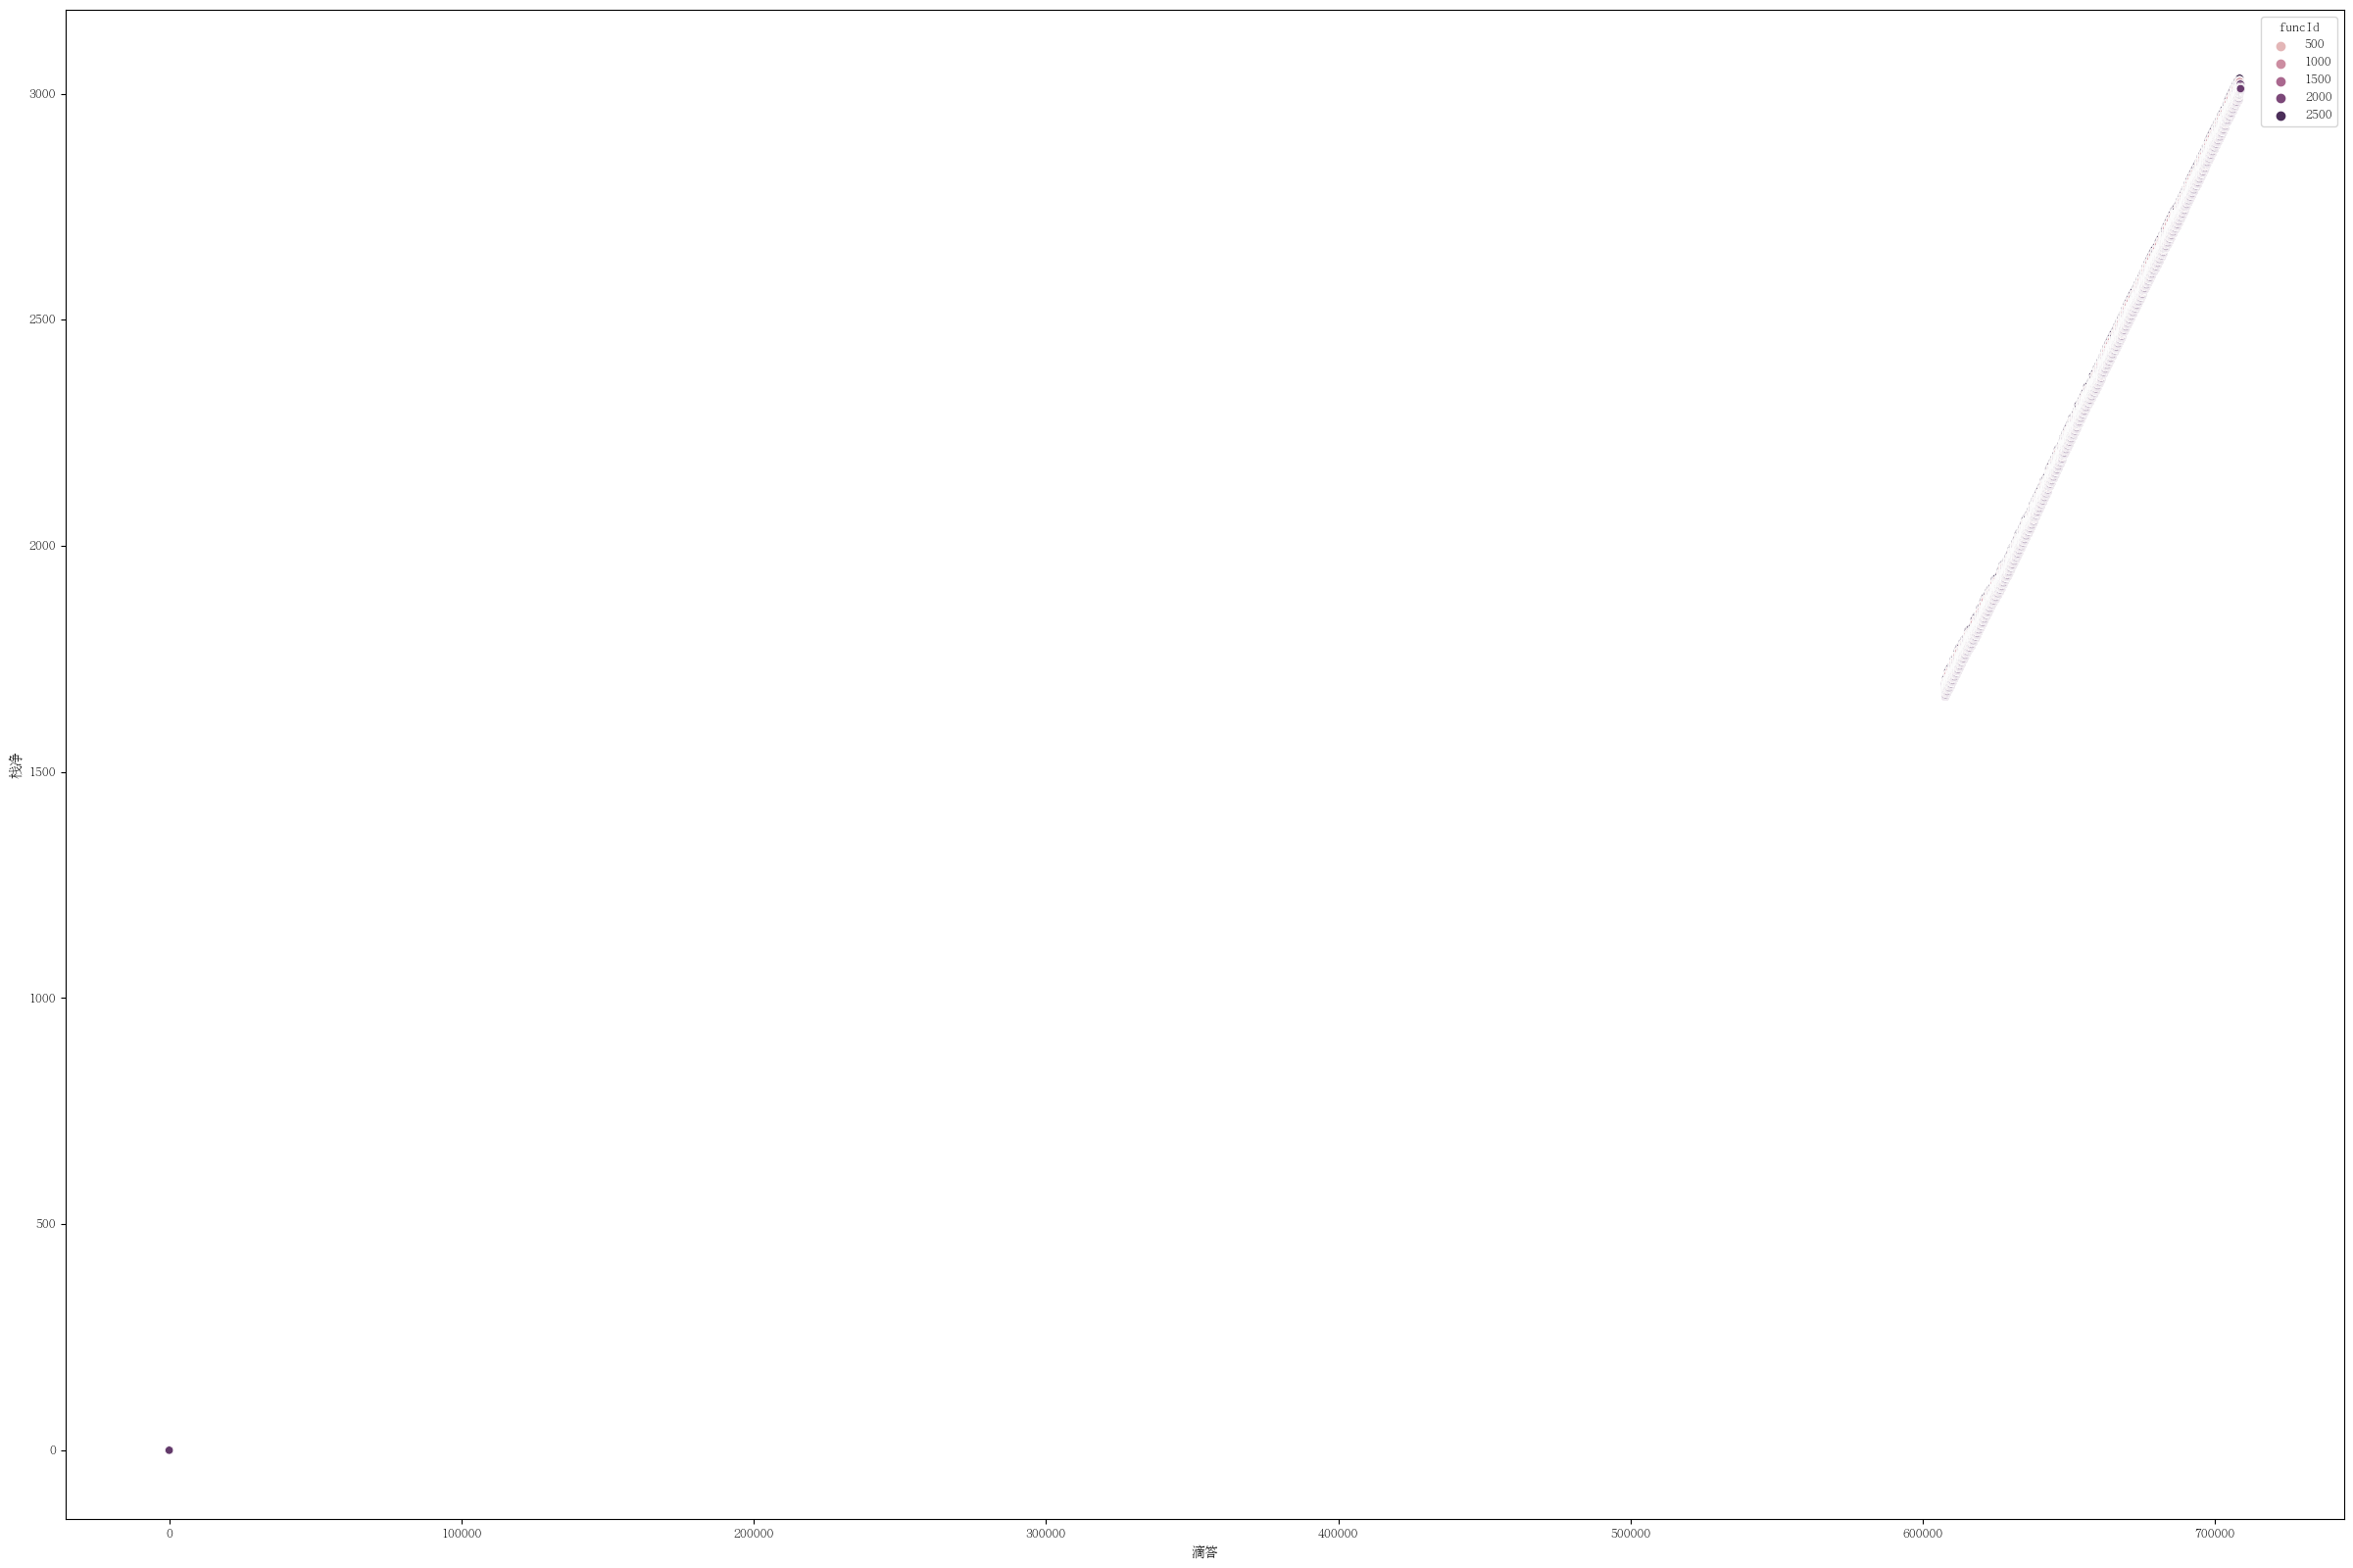

In [28]:
k=6
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.8  第8个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

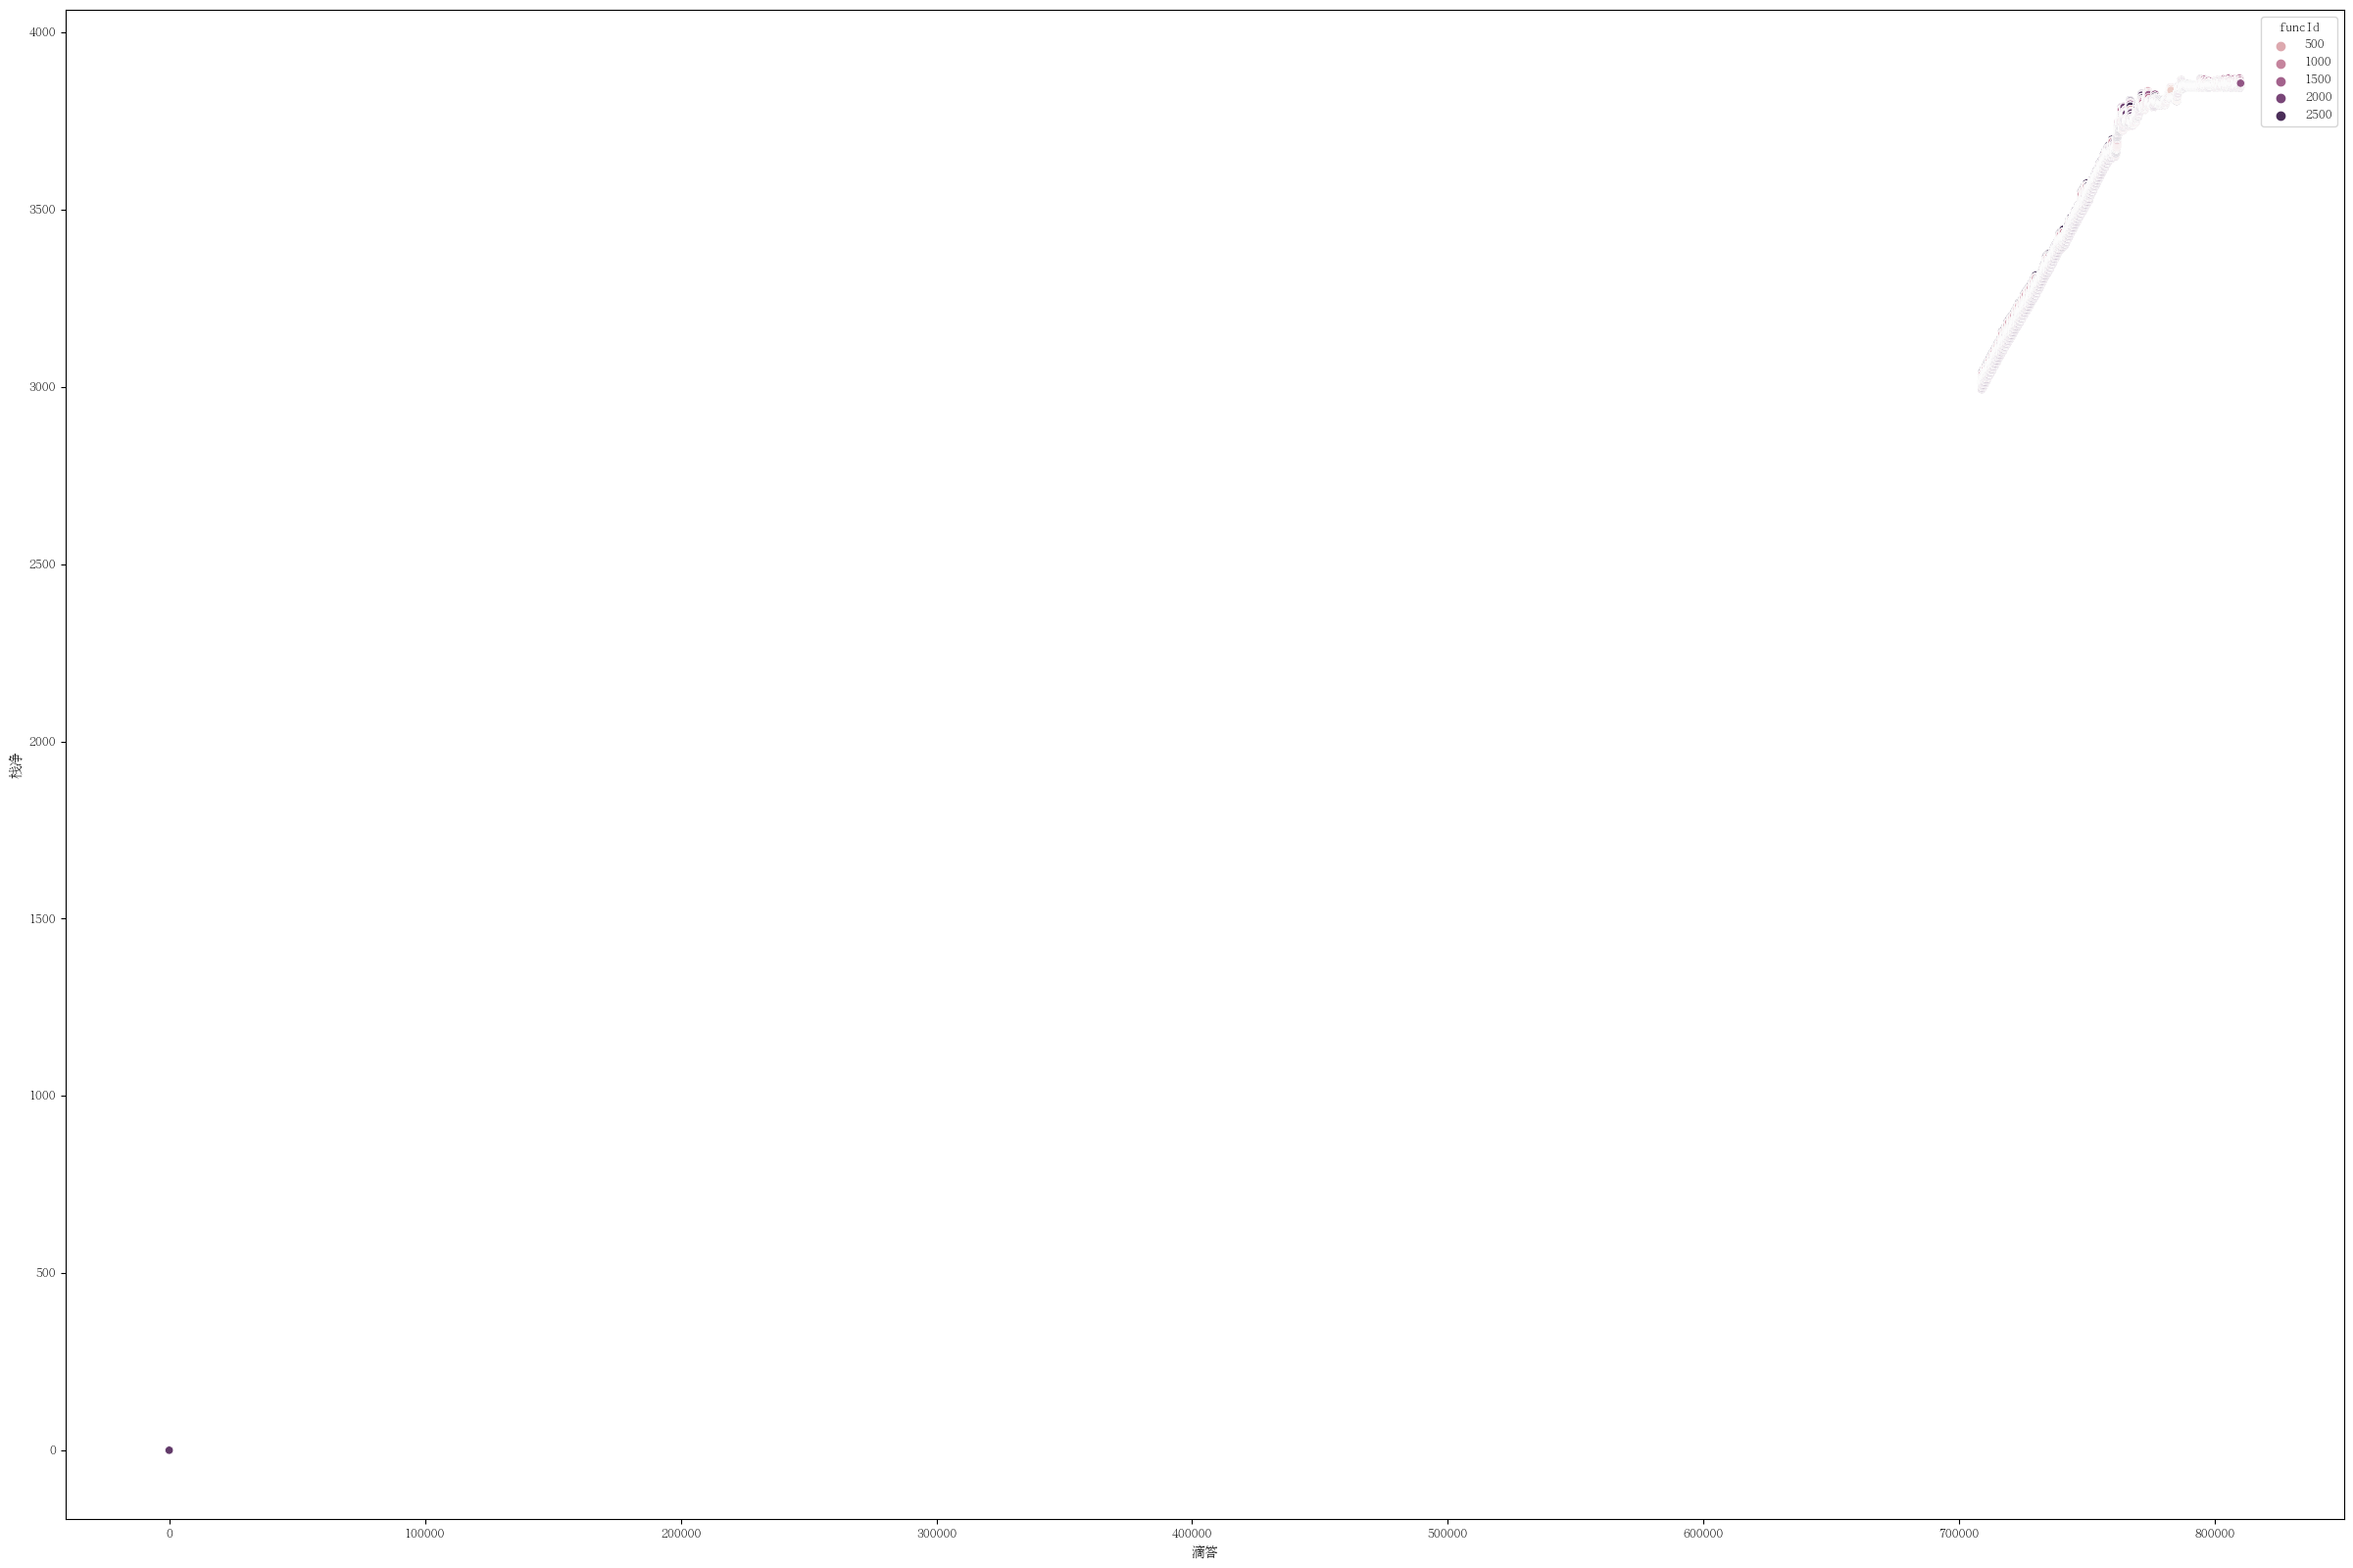

In [29]:
k=7
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.9  第9个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

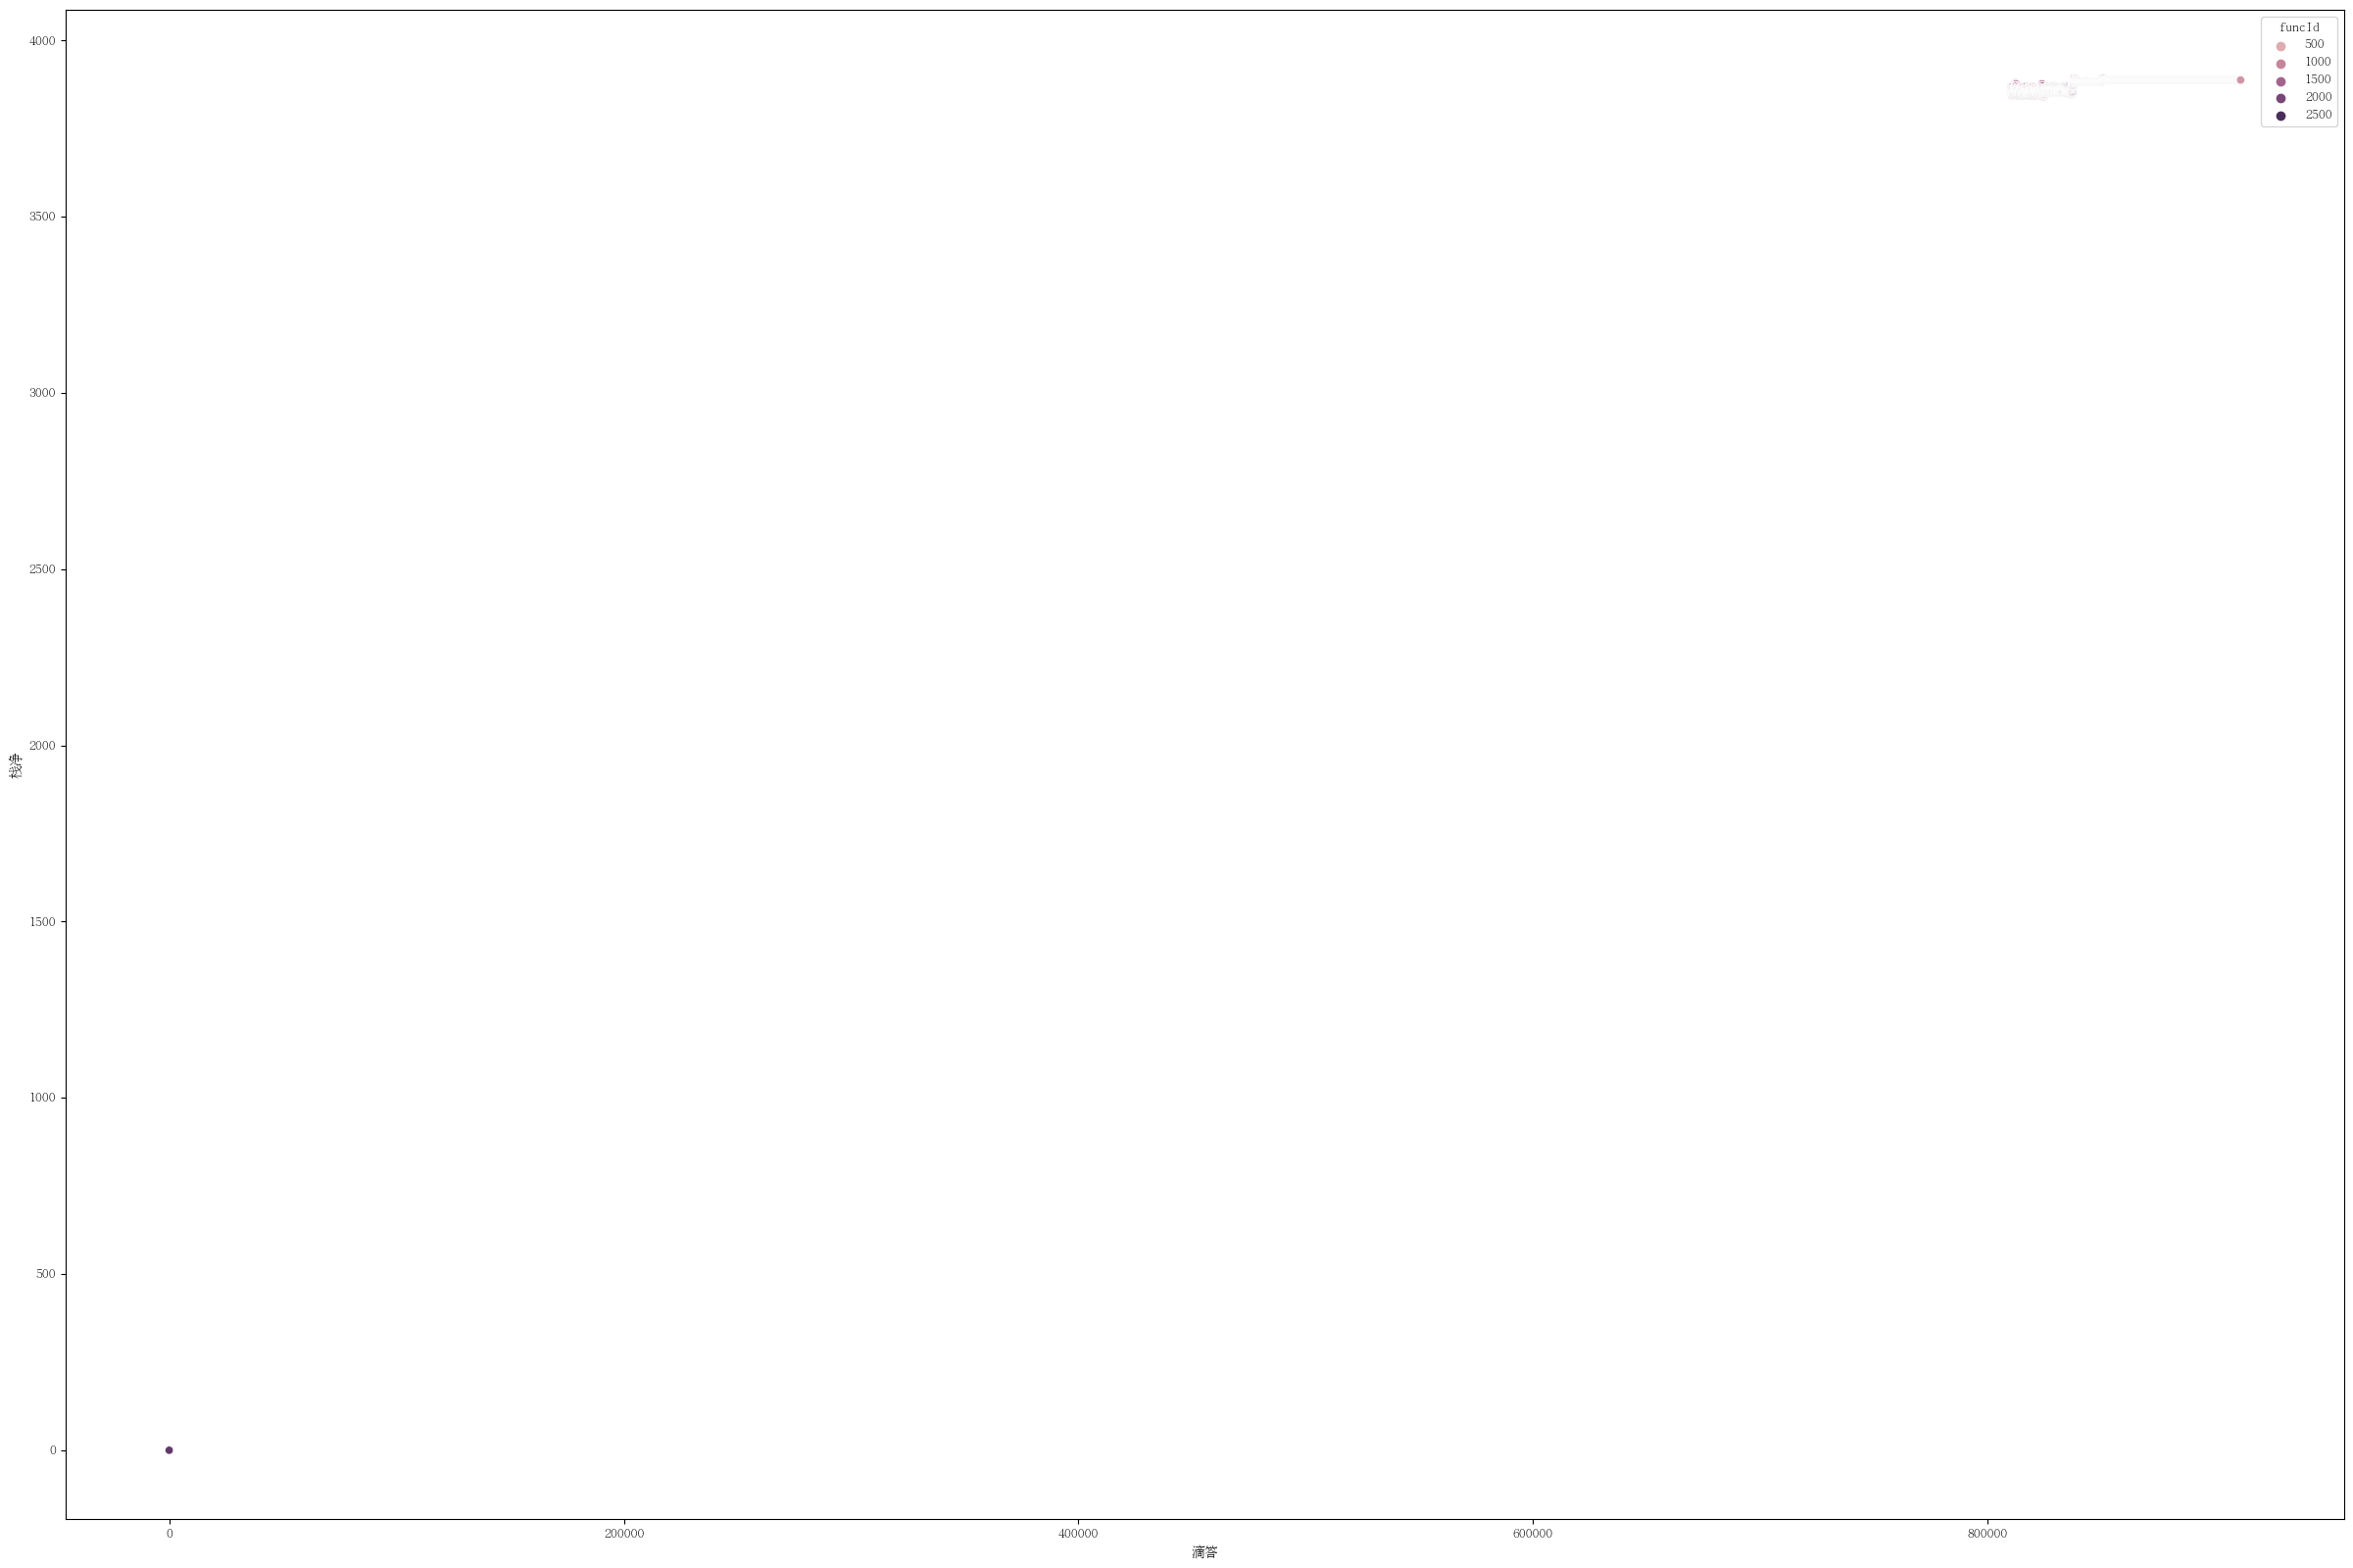

In [30]:
k=8
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

######  4.1.10  第10个10%日志

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

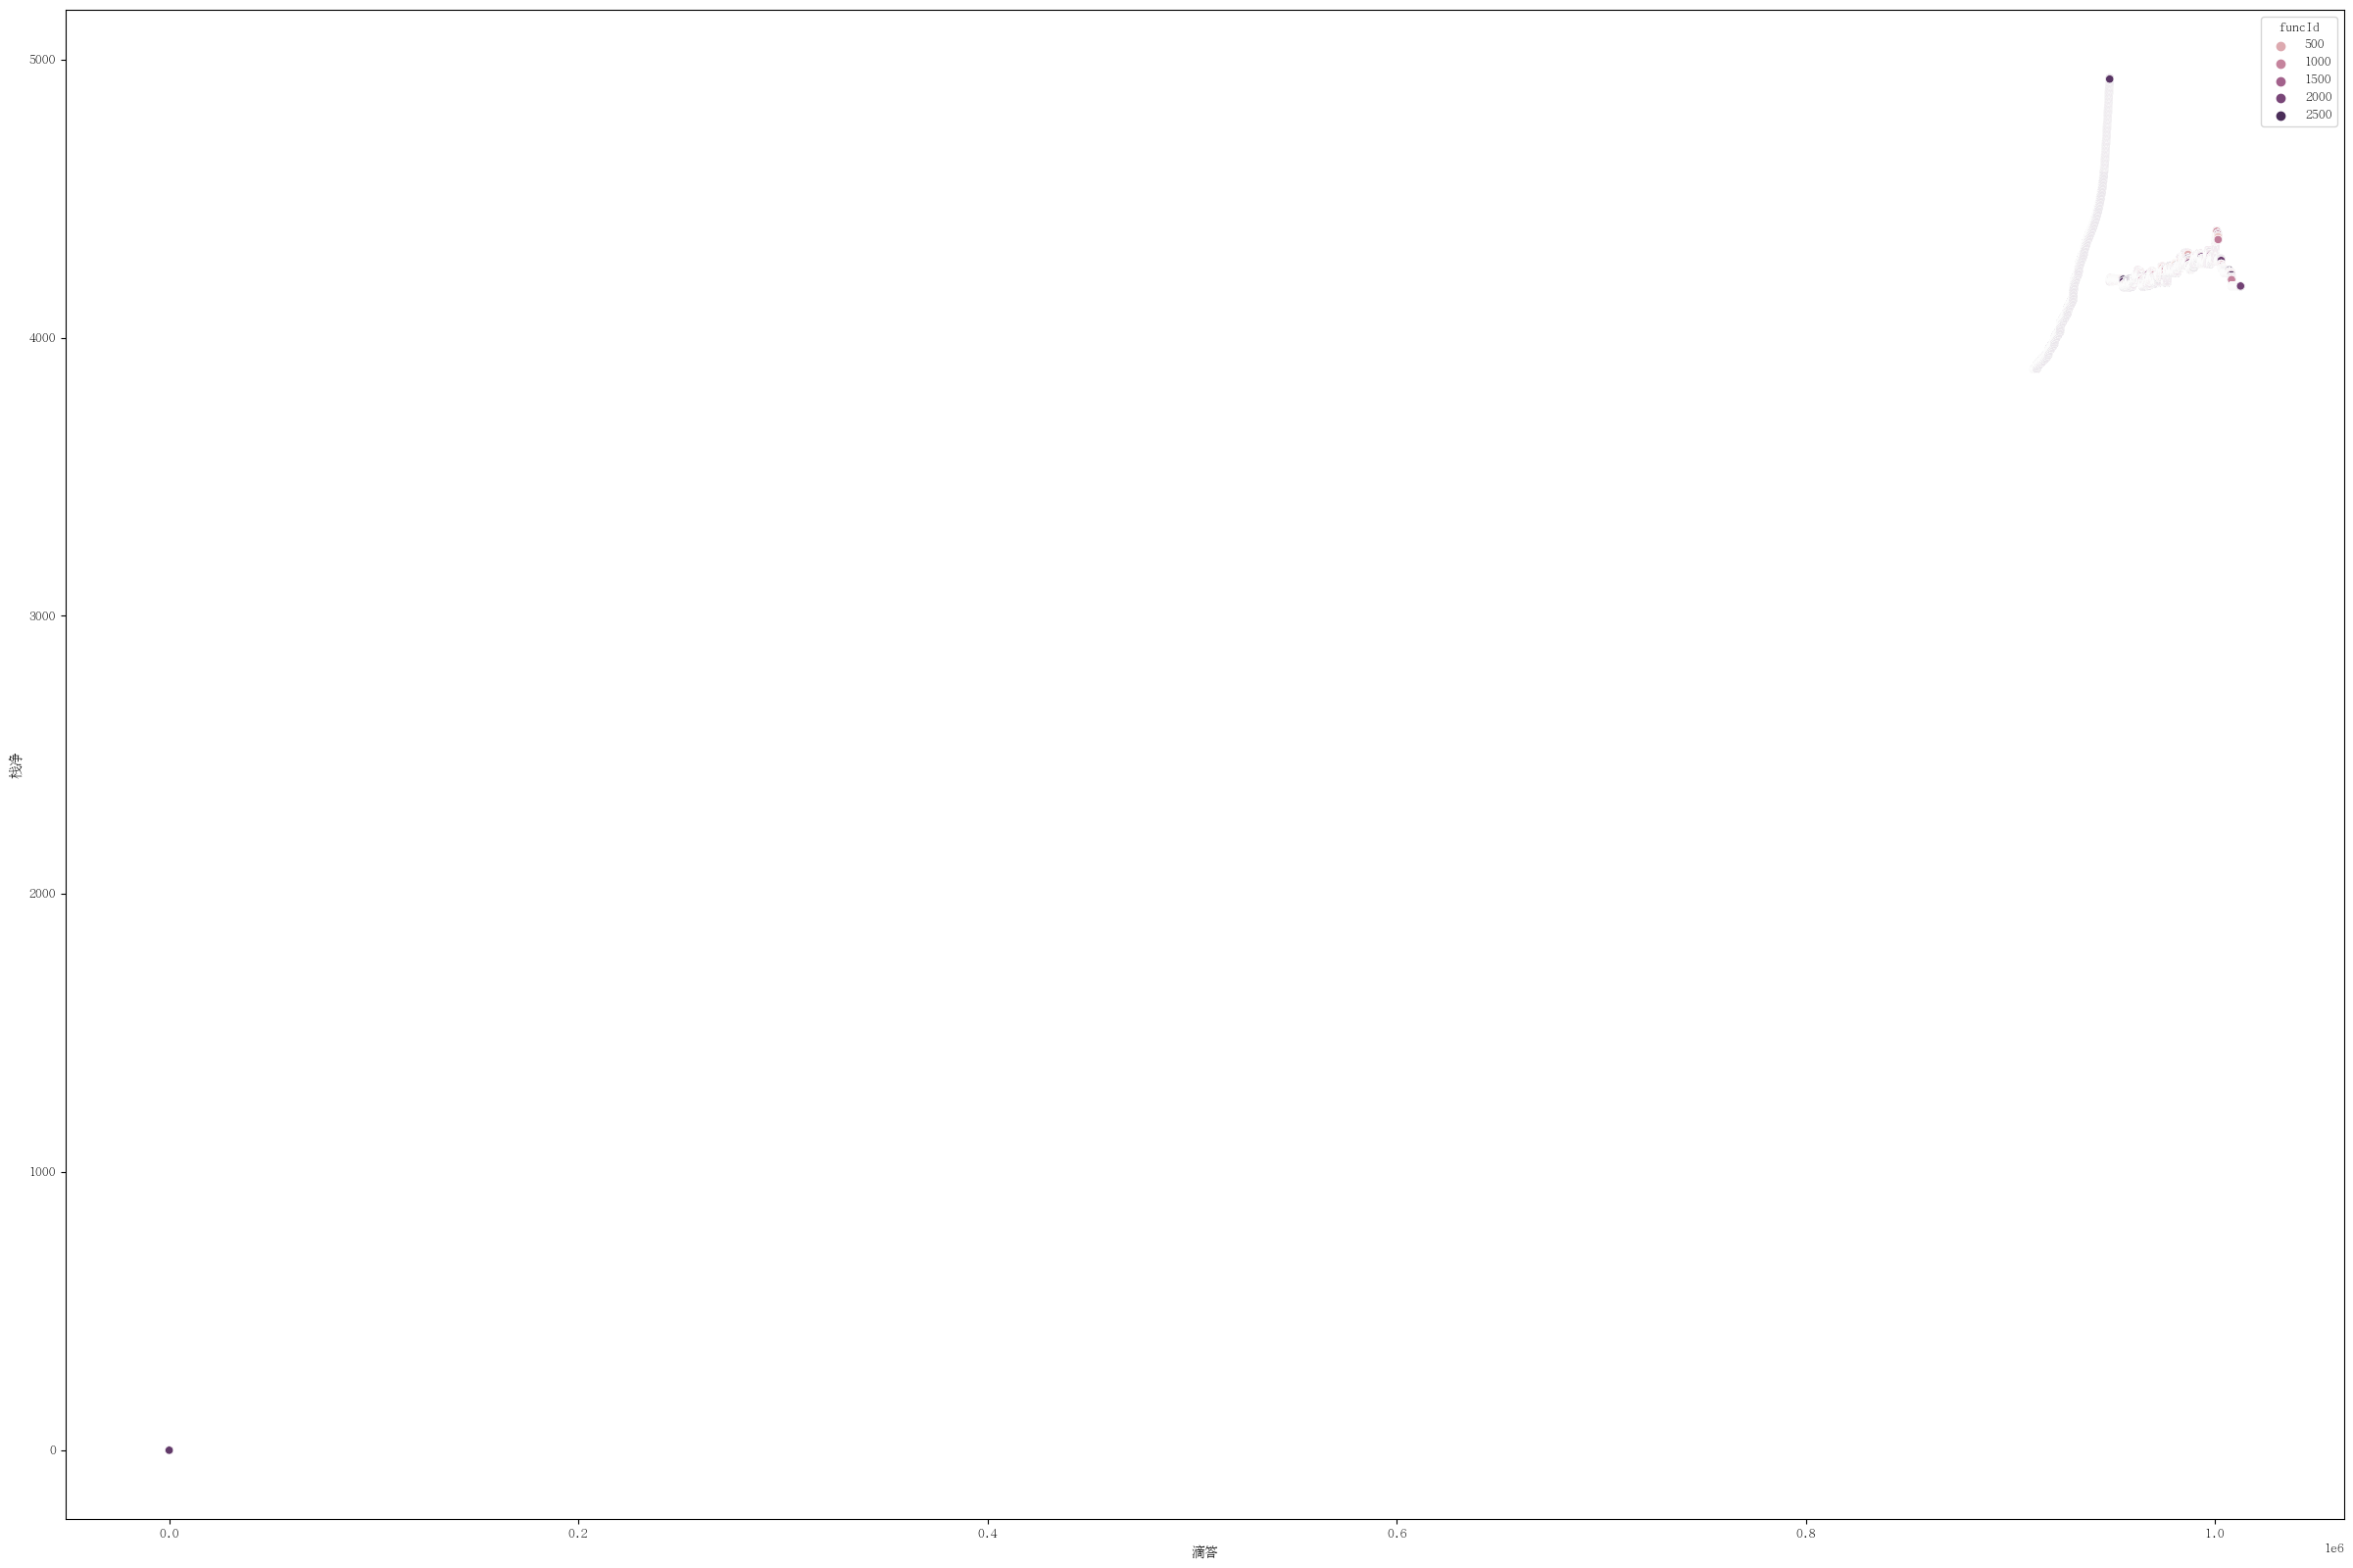

In [31]:
k=9
seaborn.scatterplot(x='滴答', y='栈净', hue='funcId', data=dfmm[k*TC10Percent:(k+1)*TC10Percent])

####  4.x 开发代码

In [32]:
# seaborn.scatterplot(x='滴答', y='栈净', size='funcId', data=dfmm)

# 3.  单日志作图 (seaborn)
>  seaborn作图会留在 .ipynb文件内，网页上浏览代码仓库中 此 .ipynb文件 即可看到 seaborn图，方便。

In [33]:
#增大图例颜色圆球的尺寸
def inrease_g_size(g):
    for lh in g.legend_.legendHandles: 
        lh.set_alpha(1)
        lh._sizes = [500] 

In [34]:

import warnings
# 过滤掉RuntimeWarning警告
warnings.filterwarnings("ignore", category=RuntimeWarning)


##  1. mini_main.c作图

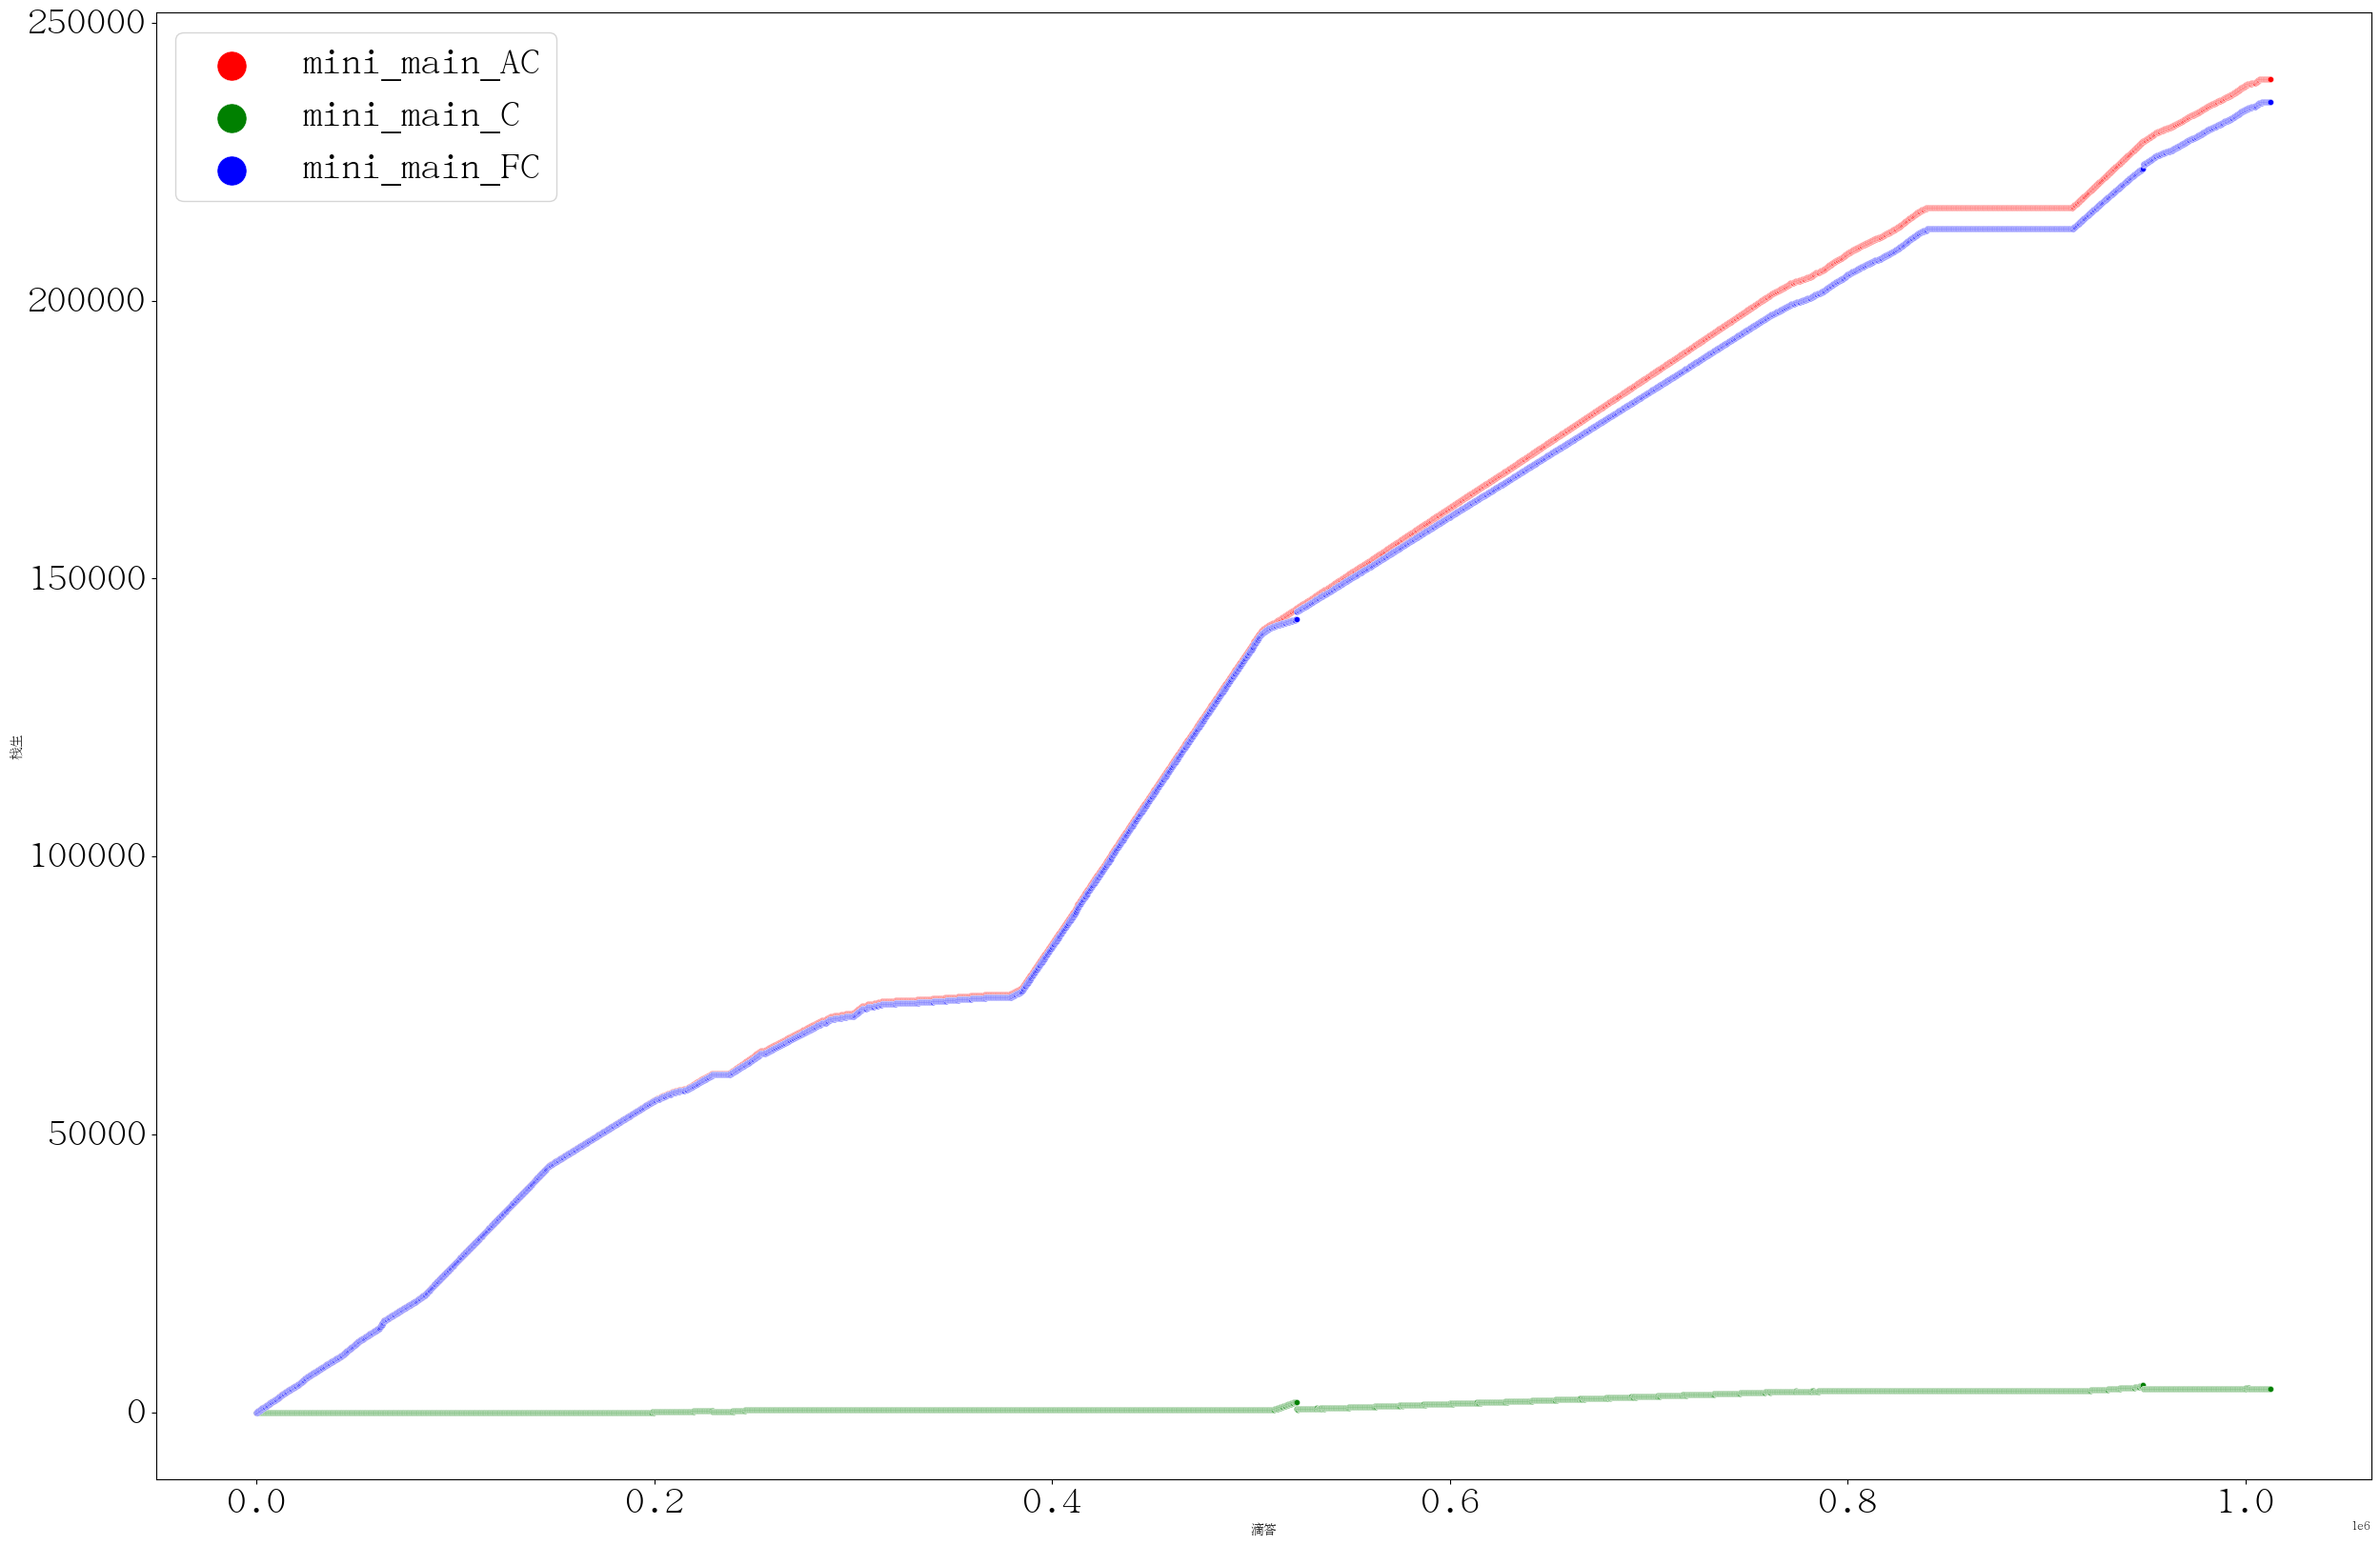

In [35]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
matplotlib.pyplot.rcParams['font.size'] = 30

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_AC',color='red',ax=ax)  
g2=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_C',color='green',ax=ax)   
g3=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_FC',color='blue',ax=ax)   

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)


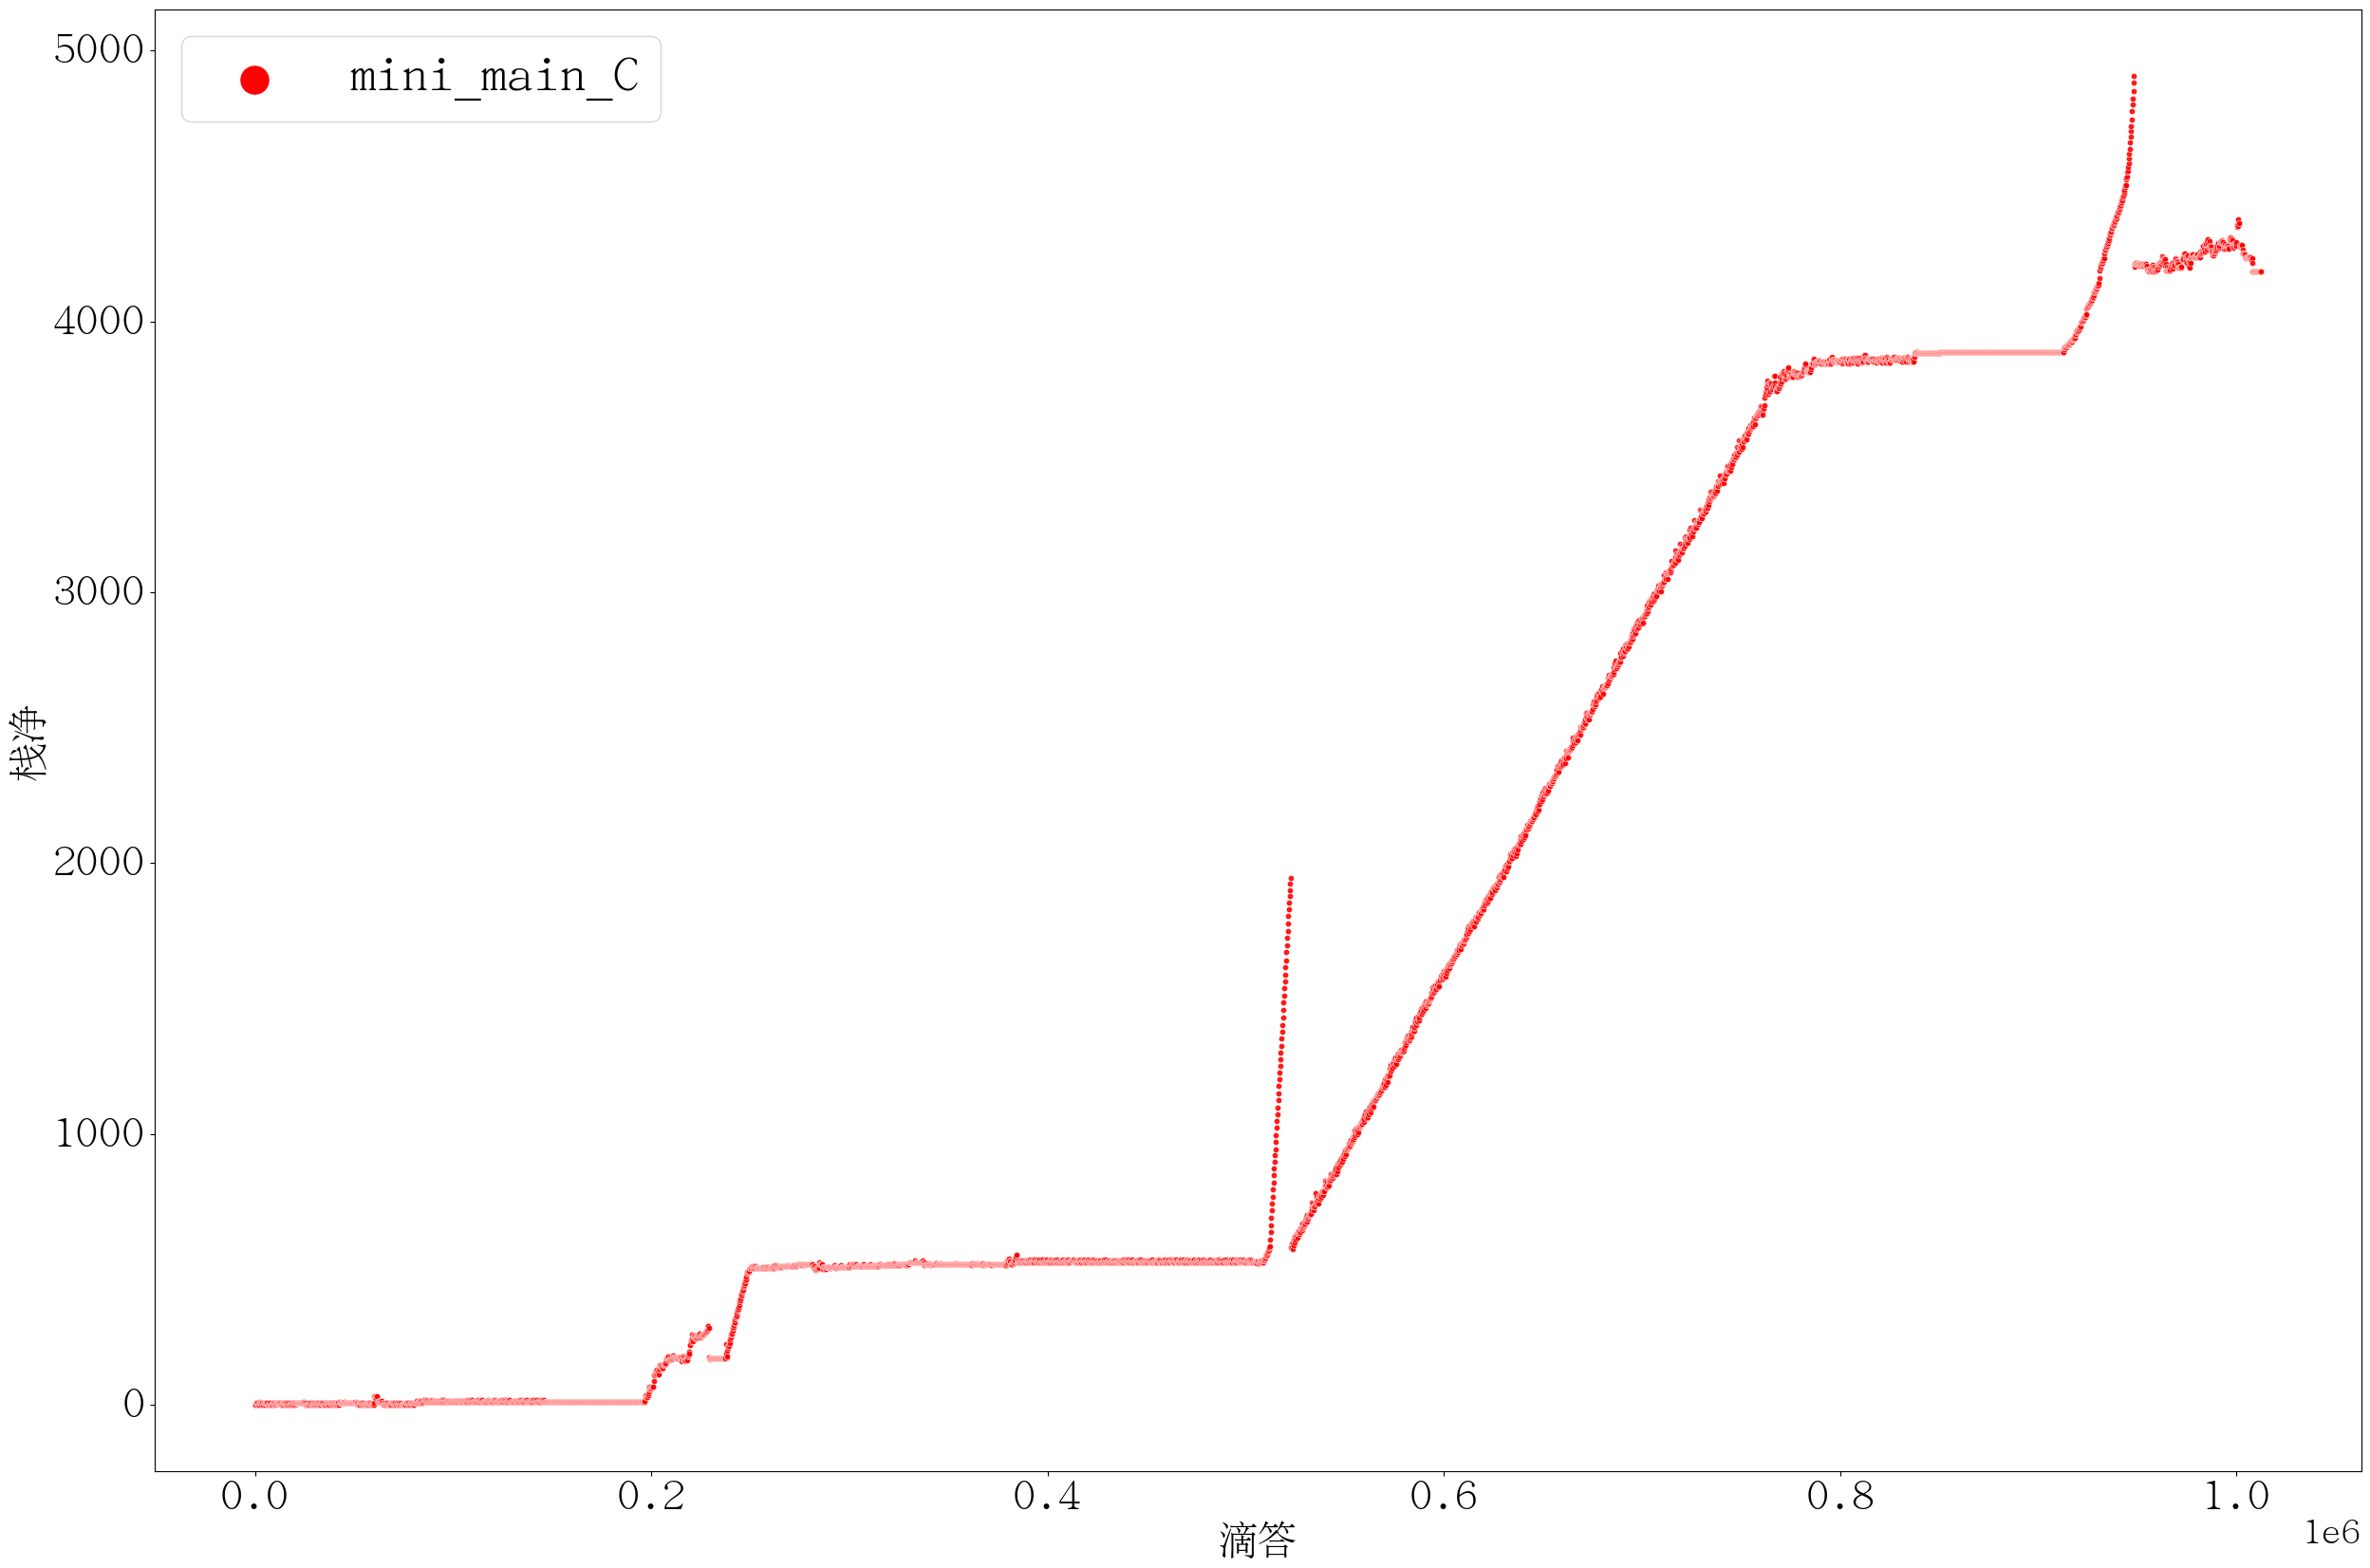

In [36]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_C',color='red',ax=ax)  

inrease_g_size(g1)


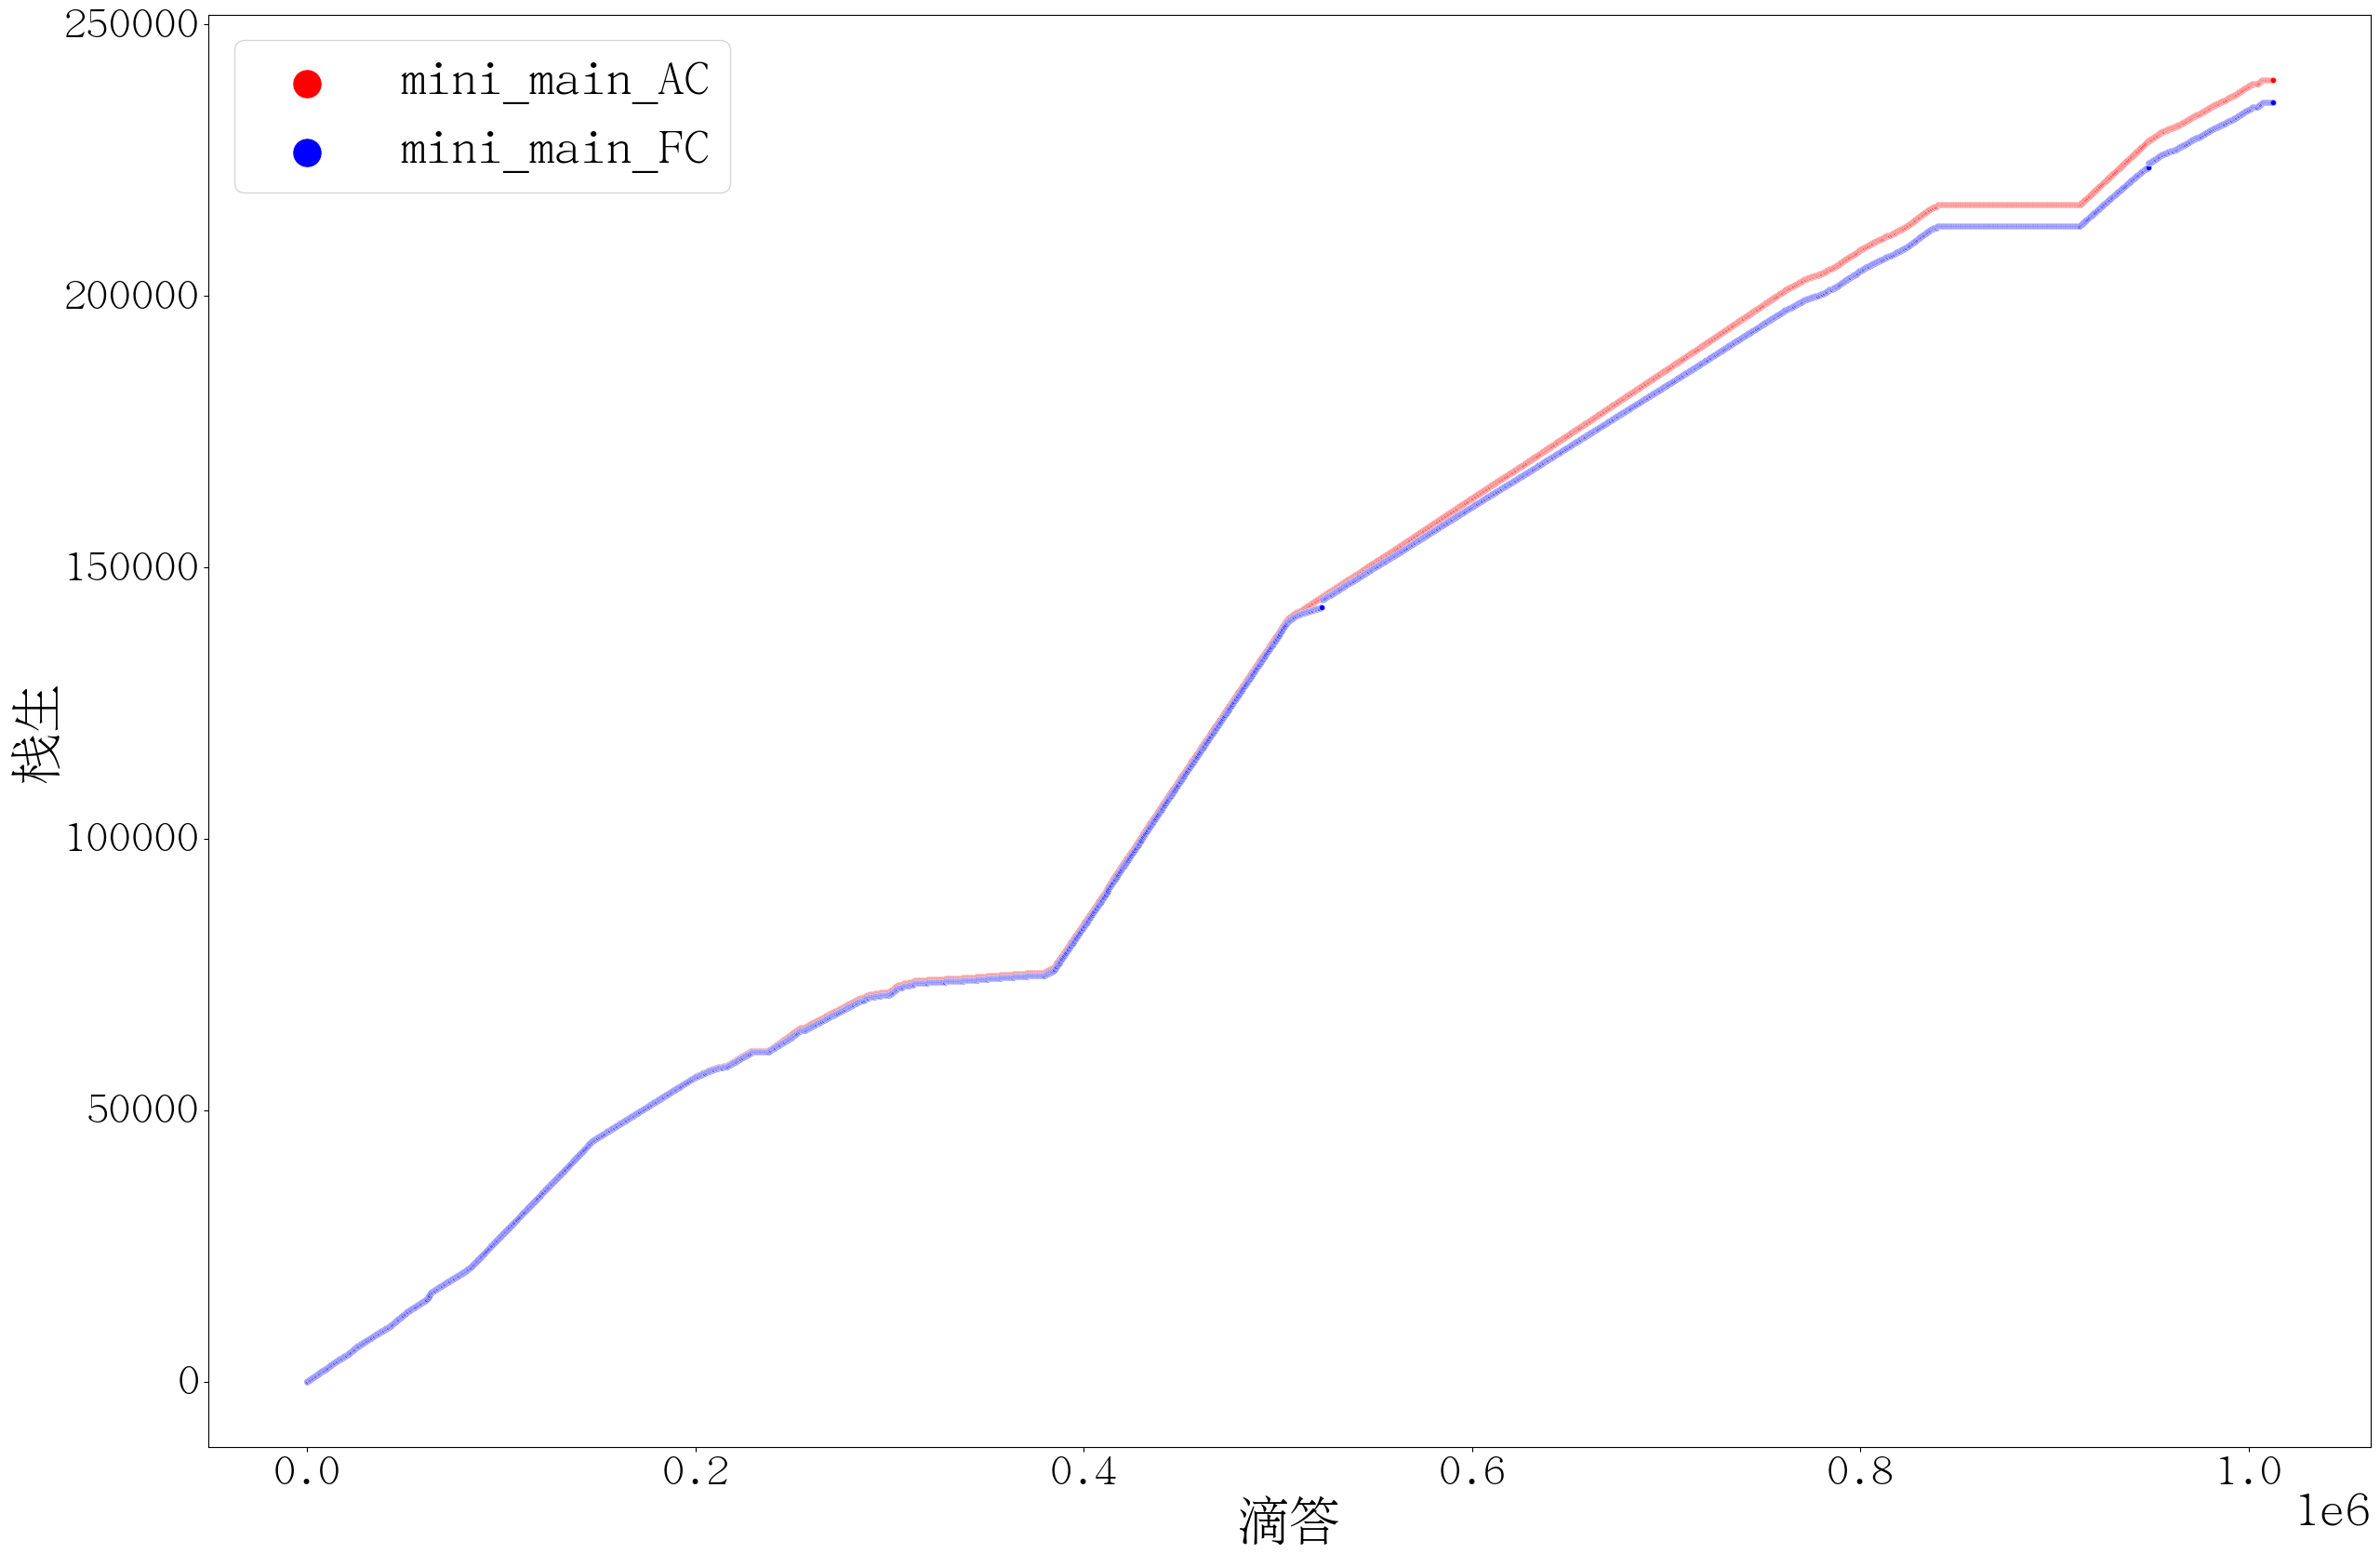

In [37]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_AC',color='red',ax=ax)  
g2=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_FC',color='blue',ax=ax)  

inrease_g_size(g1)
inrease_g_size(g2)


# 5.  单日志作图 (plotly)


> plotly作图 , 结果当然是和 seaborn一样了

> plotly作图 不会留在 .ipynb文件内，但比seaborn清晰。

##  1. mini_main.c作图


In [38]:

mini_main_栈生_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈生,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈生"
)


mini_main_栈净_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈净,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈净"
)

mini_main_栈死_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈死,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈死,"
)





In [39]:
# #浏览器中显示:
# plotly_offline.iplot([ mini_main_栈生_trace, mini_main_栈净_trace, mini_main_栈死_trace])
# plotly_offline.iplot([ mini_main_栈生_trace, mini_main_栈死_trace])
# plotly_offline.iplot([ mini_main_栈净_trace])